# CW1 - Object Recognition using CNN
To apply machine learning alorithms to clasify the testing images into object categories. Then use a model to perform classification and report quantitative results.

Due: Monday 19th April

# Introduction

The aim is to evaluate the use of CNN's in image recognition and the affect of adding multiple layers.

# Imports 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import tensorflow as tf
from sklearn.utils import shuffle

# Load Data
There are 100 different categories of objects
each has 500 images for training and 100 images for testing.
Split the data into train and test sections

In [10]:
images = np.load('trnImage.npy')
label_fine = np.load('trnLabel_fine.npy')
label_coarse = np.load('trnLabel_coarse.npy')

#image_index = 1 # pick a specific image
#image = images[:, :, :, image_index]

test_images = np.load('tstImage.npy')
test_label_fine = np.load('tstLabel_fine.npy')
test_label_coarse = np.load('tstLabel_coarse.npy')

print(f'Images Shape: {images.shape}')
print(f'Train Labels Fine Shape: {label_fine.shape}')
print(f'Train Labels Coarse Shape: {label_coarse.shape}')

Images Shape: (32, 32, 3, 50000)
Train Labels Fine Shape: (50000,)
Train Labels Coarse Shape: (50000,)


Shuffle data to ensure not ordered

In [11]:
images, label_fine, label_coarse = shuffle(images, label_fine, label_coarse, random_state=0) #make sure the samples are not ordered

ValueError: Found input variables with inconsistent numbers of samples: [32, 50000, 50000]

# CNN

In [5]:
images_reshaped = np.transpose(images, (3, 0, 1, 2))
images_reshaped = images_reshaped[:, :, :, -1]

print(images_reshaped.shape)

(50000, 32, 32)


In [67]:
test_images_reshaped = np.transpose(test_images, (3, 0, 1, 2))
test_images_reshaped = test_images_reshaped[:, :, :, 0]

print(test_images_reshaped.shape)

(10000, 32, 32)


Normalise the data, for each image do a hog, add how to array, train images

(50000, 32, 32)
Images Shape: (32, 32, 3, 50000)


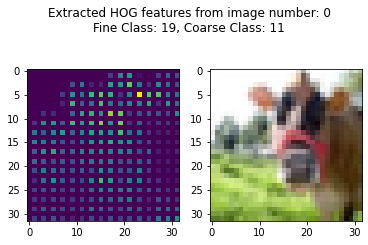

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00138648 0.         ... 0.23965091 0.         0.18503384]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.13589142 0.         ... 0.26251863 0.         0.22911911]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13536761 0.         ... 0.33175385 0.         0.38671539]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00138648 0.         ... 0.23965091 0.         0.18503384]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.13589142 0.         ... 0.26251863 0.         0.22911911]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13536761 0.         ... 0.33175385 0.         0.38671539]]


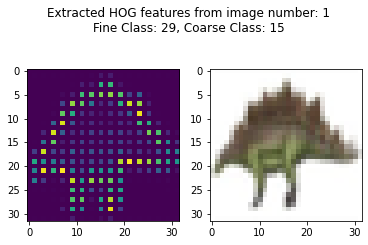

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.00392157 0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.00392157 0.         0.00392157]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.00392157 0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.00392157 0.         0.00392157]]


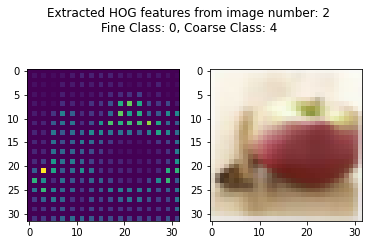

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02502938 0.         ... 0.0256508  0.         0.01086545]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0615553  0.         ... 0.11125895 0.         0.20201388]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08447684 0.         ... 0.14327712 0.         0.12128406]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02502938 0.         ... 0.0256508  0.         0.01086545]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0615553  0.         ... 0.11125895 0.         0.20201388]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08447684 0.         ... 0.14327712 0.         0.12128406]]


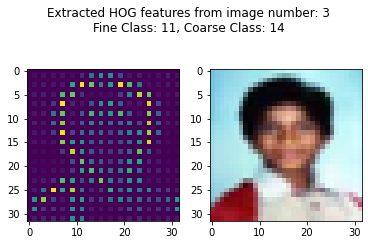

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02760093 0.         ... 0.06683183 0.         0.03769963]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.42221867 0.         ... 0.15081968 0.         0.45554963]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05737664 0.         ... 0.06416923 0.         0.05627623]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02760093 0.         ... 0.06683183 0.         0.03769963]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.42221867 0.         ... 0.15081968 0.         0.45554963]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05737664 0.         ... 0.06416923 0.         0.05627623]]


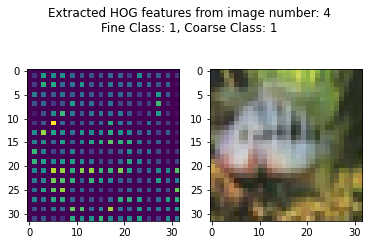

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06810874 0.         ... 0.11635307 0.         0.07004209]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.11896927 0.         ... 0.2087327  0.         0.26247565]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10201522 0.         ... 0.22374805 0.         0.19624624]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06810874 0.         ... 0.11635307 0.         0.07004209]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.11896927 0.         ... 0.2087327  0.         0.26247565]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10201522 0.         ... 0.22374805 0.         0.19624624]]


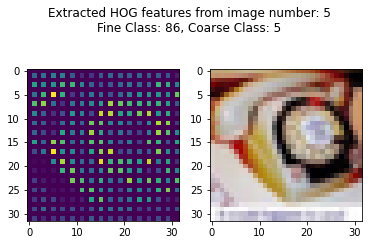

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.24707416 0.         ... 0.20277382 0.         0.05596744]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.16549029 0.         ... 0.15645739 0.         0.1765282 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14250475 0.         ... 0.15397419 0.         0.00490196]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.24707416 0.         ... 0.20277382 0.         0.05596744]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.16549029 0.         ... 0.15645739 0.         0.1765282 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14250475 0.         ... 0.15397419 0.         0.00490196]]


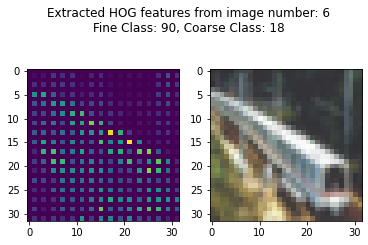

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02146318 0.         ... 0.1745991  0.         0.09842964]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.13022454 0.         ... 0.3015404  0.         0.20784418]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09765325 0.         ... 0.06955122 0.         0.04540559]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02146318 0.         ... 0.1745991  0.         0.09842964]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.13022454 0.         ... 0.3015404  0.         0.20784418]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09765325 0.         ... 0.06955122 0.         0.04540559]]


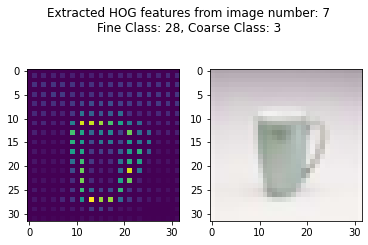

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02804066 0.         ... 0.03444387 0.         0.03345541]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01456598 0.         ... 0.         0.         0.00784314]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00604145 0.         ... 0.00294118 0.         0.00784314]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02804066 0.         ... 0.03444387 0.         0.03345541]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01456598 0.         ... 0.         0.         0.00784314]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00604145 0.         ... 0.00294118 0.         0.00784314]]


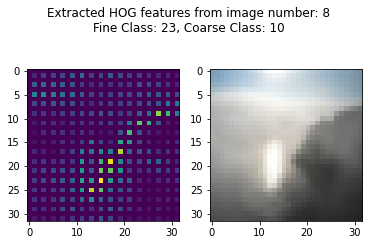

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03712362 0.         ... 0.04177875 0.         0.02588407]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04562716 0.         ... 0.02403378 0.         0.01506378]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02372357 0.         ... 0.01441981 0.         0.01078431]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03712362 0.         ... 0.04177875 0.         0.02588407]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04562716 0.         ... 0.02403378 0.         0.01506378]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02372357 0.         ... 0.01441981 0.         0.01078431]]


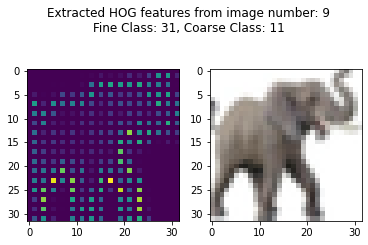

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.43340306 0.         0.07843137]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.10412437 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.21200046 0.         ... 0.         0.         0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.43340306 0.         0.07843137]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.10412437 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.21200046 0.         ... 0.         0.         0.        ]]


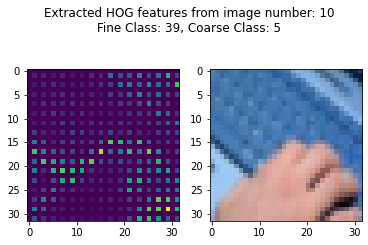

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05572582 0.         ... 0.38689916 0.         0.1312226 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.26347582 0.         ... 0.61511868 0.         0.40345175]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15229826 0.         ... 0.18703751 0.         0.13350352]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05572582 0.         ... 0.38689916 0.         0.1312226 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.26347582 0.         ... 0.61511868 0.         0.40345175]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15229826 0.         ... 0.18703751 0.         0.13350352]]


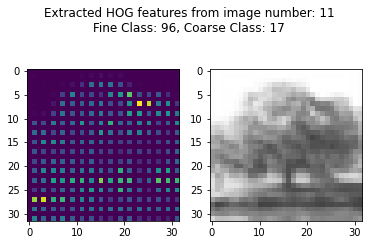

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.00098039 0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.17883655 0.         ... 0.16371745 0.         0.16224574]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.20291863 0.         ... 0.03866818 0.         0.11971276]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.00098039 0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.17883655 0.         ... 0.16371745 0.         0.16224574]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.20291863 0.         ... 0.03866818 0.         0.11971276]]


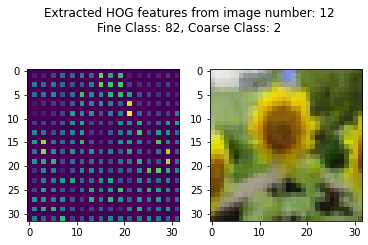

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04965031 0.         ... 0.09162561 0.         0.05115491]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.26449543 0.         ... 0.32075799 0.         0.13199799]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.23757832 0.         ... 0.18256688 0.         0.14368634]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04965031 0.         ... 0.09162561 0.         0.05115491]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.26449543 0.         ... 0.32075799 0.         0.13199799]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.23757832 0.         ... 0.18256688 0.         0.14368634]]


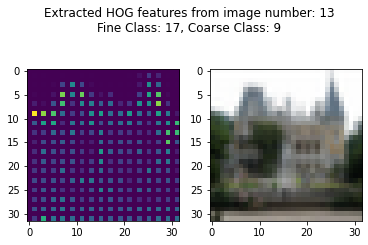

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.00415301 0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.16339421 0.         ... 0.23342405 0.         0.2081282 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10997304 0.         ... 0.23056111 0.         0.23245765]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.00415301 0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.16339421 0.         ... 0.23342405 0.         0.2081282 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10997304 0.         ... 0.23056111 0.         0.23245765]]


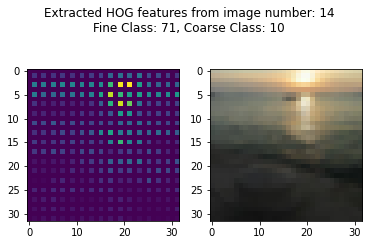

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06080181 0.         ... 0.0810027  0.         0.06766286]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01667518 0.         ... 0.02017522 0.         0.0312431 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00865532 0.         ... 0.00808102 0.         0.00767493]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06080181 0.         ... 0.0810027  0.         0.06766286]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01667518 0.         ... 0.02017522 0.         0.0312431 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00865532 0.         ... 0.00808102 0.         0.00767493]]


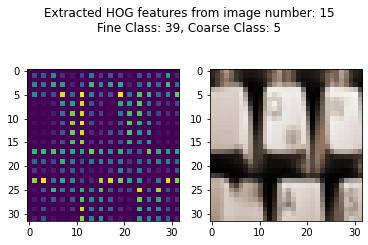

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16593792 0.         ... 0.42273381 0.         0.07926443]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04896797 0.         ... 0.19130311 0.         0.09508349]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06297929 0.         ... 0.23554632 0.         0.07570752]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16593792 0.         ... 0.42273381 0.         0.07926443]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04896797 0.         ... 0.19130311 0.         0.09508349]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06297929 0.         ... 0.23554632 0.         0.07570752]]


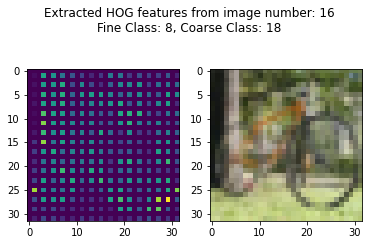

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01883441 0.         ... 0.15613185 0.         0.05785428]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.1053775  0.         ... 0.17249334 0.         0.0716714 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04879385 0.         ... 0.08582436 0.         0.0845127 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01883441 0.         ... 0.15613185 0.         0.05785428]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.1053775  0.         ... 0.17249334 0.         0.0716714 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04879385 0.         ... 0.08582436 0.         0.0845127 ]]


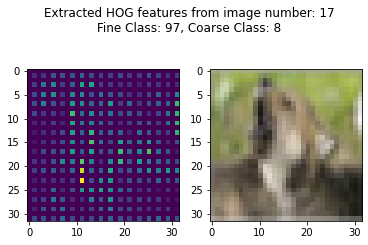

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06390002 0.         ... 0.07759474 0.         0.08949332]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04739079 0.         ... 0.0823858  0.         0.01845598]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1169158  0.         ... 0.14645775 0.         0.12576534]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06390002 0.         ... 0.07759474 0.         0.08949332]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04739079 0.         ... 0.0823858  0.         0.01845598]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1169158  0.         ... 0.14645775 0.         0.12576534]]


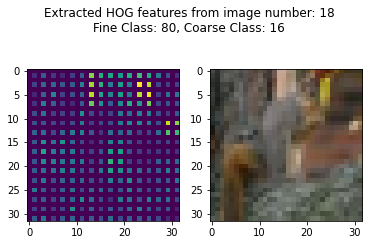

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0491047  0.         ... 0.09894204 0.         0.05296078]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.07920852 0.         ... 0.11427166 0.         0.03753081]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11532525 0.         ... 0.04321944 0.         0.03592482]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0491047  0.         ... 0.09894204 0.         0.05296078]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.07920852 0.         ... 0.11427166 0.         0.03753081]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11532525 0.         ... 0.04321944 0.         0.03592482]]


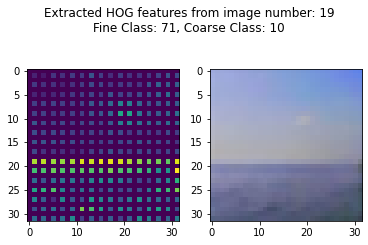

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01222758 0.         ... 0.0331676  0.         0.02944941]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.03372721 0.         ... 0.06085544 0.         0.03198102]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04596916 0.         ... 0.04140724 0.         0.05413059]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01222758 0.         ... 0.0331676  0.         0.02944941]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.03372721 0.         ... 0.06085544 0.         0.03198102]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04596916 0.         ... 0.04140724 0.         0.05413059]]


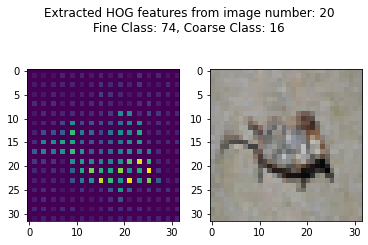

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02912225 0.         ... 0.0290175  0.         0.03302112]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05442847 0.         ... 0.03450636 0.         0.05448214]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01942182 0.         ... 0.04292134 0.         0.04814781]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02912225 0.         ... 0.0290175  0.         0.03302112]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05442847 0.         ... 0.03450636 0.         0.05448214]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01942182 0.         ... 0.04292134 0.         0.04814781]]


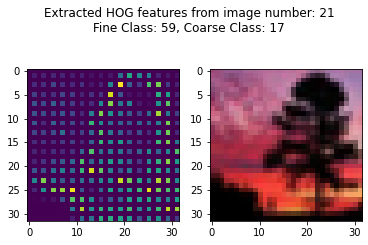

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05156969 0.         ... 0.04634685 0.         0.02958857]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.60930653 0.         0.57028756]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.21952785 0.         0.1159012 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05156969 0.         ... 0.04634685 0.         0.02958857]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.60930653 0.         0.57028756]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.21952785 0.         0.1159012 ]]


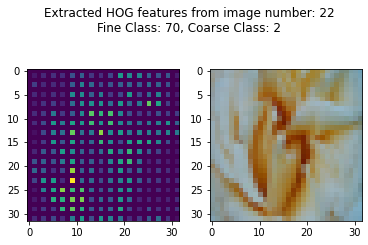

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04078536 0.         ... 0.17575692 0.         0.0493312 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05900556 0.         ... 0.09151479 0.         0.09653419]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07552284 0.         ... 0.09945887 0.         0.02735246]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04078536 0.         ... 0.17575692 0.         0.0493312 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05900556 0.         ... 0.09151479 0.         0.09653419]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07552284 0.         ... 0.09945887 0.         0.02735246]]


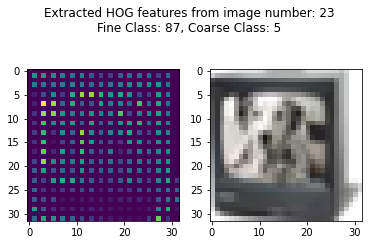

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.377571   0.         ... 0.23506947 0.         0.00796383]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.412578   0.         ... 0.43686135 0.         0.03910954]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.2382578  0.         ... 0.10583116 0.         0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.377571   0.         ... 0.23506947 0.         0.00796383]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.412578   0.         ... 0.43686135 0.         0.03910954]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.2382578  0.         ... 0.10583116 0.         0.        ]]


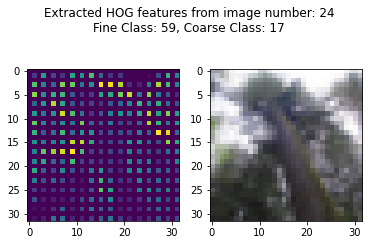

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07359817 0.         ... 0.29212955 0.         0.20535487]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01746974 0.         ... 0.12705897 0.         0.07741956]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02156863 0.         ... 0.07315248 0.         0.09986611]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07359817 0.         ... 0.29212955 0.         0.20535487]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01746974 0.         ... 0.12705897 0.         0.07741956]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02156863 0.         ... 0.07315248 0.         0.09986611]]


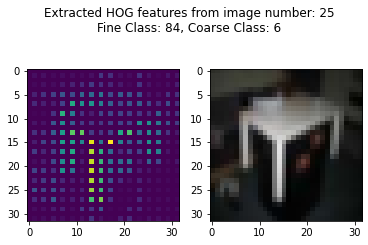

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02543556 0.         ... 0.04146589 0.         0.03604221]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02383385 0.         ... 0.01985848 0.         0.02001609]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01412071 0.         ... 0.01900507 0.         0.00988506]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02543556 0.         ... 0.04146589 0.         0.03604221]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02383385 0.         ... 0.01985848 0.         0.02001609]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01412071 0.         ... 0.01900507 0.         0.00988506]]


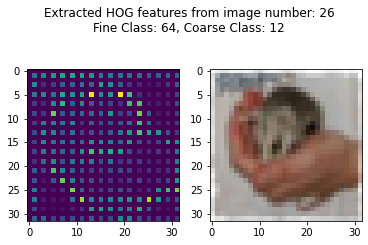

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.17985258 0.         ... 0.15249866 0.         0.13960804]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.11327789 0.         ... 0.02248293 0.         0.12985072]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14843508 0.         ... 0.07328811 0.         0.07160706]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.17985258 0.         ... 0.15249866 0.         0.13960804]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.11327789 0.         ... 0.02248293 0.         0.12985072]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14843508 0.         ... 0.07328811 0.         0.07160706]]


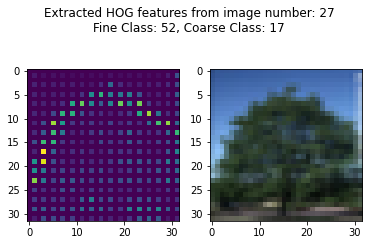

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04255021 0.         ... 0.04695074 0.         0.15590465]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.16612145 0.         ... 0.19263552 0.         0.1298227 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05039278 0.         ... 0.04362741 0.         0.06163794]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04255021 0.         ... 0.04695074 0.         0.15590465]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.16612145 0.         ... 0.19263552 0.         0.1298227 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05039278 0.         ... 0.04362741 0.         0.06163794]]


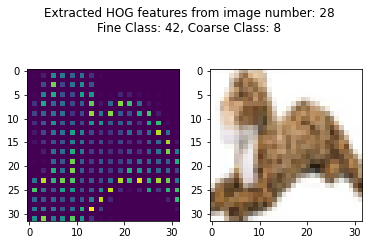

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00588235 0.         ... 0.00392157 0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.29585502 0.         ... 0.00408066 0.         0.03778745]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.37307851 0.         ... 0.00490196 0.         0.00588235]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00588235 0.         ... 0.00392157 0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.29585502 0.         ... 0.00408066 0.         0.03778745]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.37307851 0.         ... 0.00490196 0.         0.00588235]]


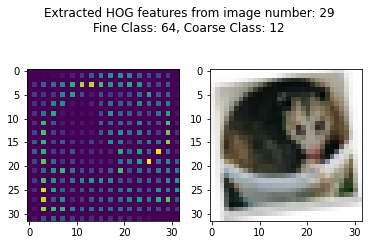

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00310027 0.         ... 0.13736114 0.         0.0127994 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04344632 0.         ... 0.17988788 0.         0.14049952]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04737056 0.         ... 0.00611379 0.         0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00310027 0.         ... 0.13736114 0.         0.0127994 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04344632 0.         ... 0.17988788 0.         0.14049952]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04737056 0.         ... 0.00611379 0.         0.        ]]


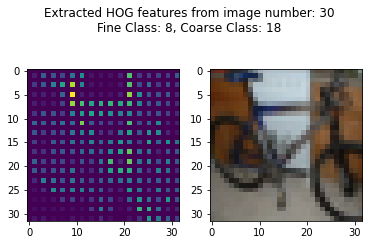

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04910589 0.         ... 0.11250855 0.         0.1892157 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02079764 0.         ... 0.06166439 0.         0.067085  ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03568799 0.         ... 0.19673997 0.         0.11940069]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04910589 0.         ... 0.11250855 0.         0.1892157 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02079764 0.         ... 0.06166439 0.         0.067085  ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03568799 0.         ... 0.19673997 0.         0.11940069]]


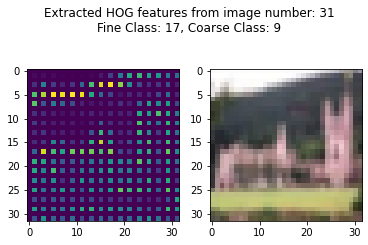

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01297654 0.         ... 0.2173389  0.         0.19906655]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.30764607 0.         ... 0.37046569 0.         0.29528779]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13842649 0.         ... 0.14908318 0.         0.13476948]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01297654 0.         ... 0.2173389  0.         0.19906655]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.30764607 0.         ... 0.37046569 0.         0.29528779]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13842649 0.         ... 0.14908318 0.         0.13476948]]


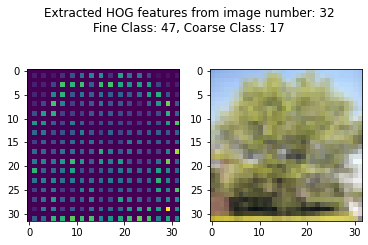

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04171857 0.         ... 0.02516999 0.         0.02708838]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0394591  0.         ... 0.52451194 0.         0.25927835]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15303916 0.         ... 0.3118116  0.         0.2502695 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04171857 0.         ... 0.02516999 0.         0.02708838]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0394591  0.         ... 0.52451194 0.         0.25927835]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15303916 0.         ... 0.3118116  0.         0.2502695 ]]


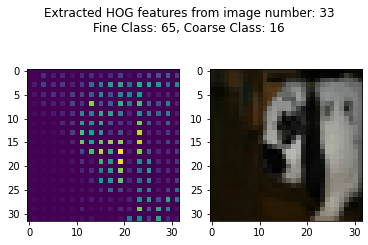

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00686274 0.         ... 0.18829955 0.         0.11380185]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01396337 0.         ... 0.28117678 0.         0.03486132]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01257936 0.         ... 0.07287017 0.         0.02963877]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00686274 0.         ... 0.18829955 0.         0.11380185]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01396337 0.         ... 0.28117678 0.         0.03486132]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01257936 0.         ... 0.07287017 0.         0.02963877]]


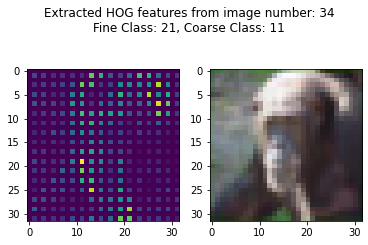

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11925571 0.         ... 0.12325089 0.         0.08824819]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.16328554 0.         ... 0.10920798 0.         0.07806155]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07121142 0.         ... 0.0584928  0.         0.04090499]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11925571 0.         ... 0.12325089 0.         0.08824819]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.16328554 0.         ... 0.10920798 0.         0.07806155]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07121142 0.         ... 0.0584928  0.         0.04090499]]


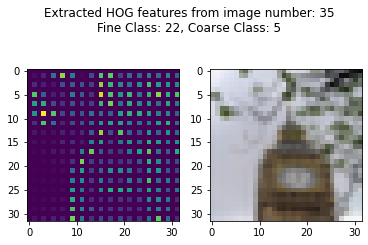

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01902133 0.         ... 0.27409586 0.         0.18393404]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01290419 0.         ... 0.22766645 0.         0.06406676]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02843137 0.         ... 0.20414171 0.         0.07499664]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01902133 0.         ... 0.27409586 0.         0.18393404]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01290419 0.         ... 0.22766645 0.         0.06406676]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02843137 0.         ... 0.20414171 0.         0.07499664]]


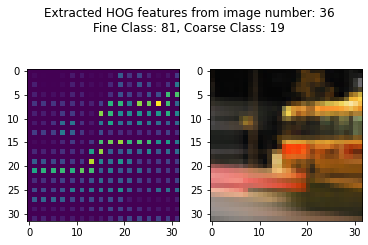

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02156863 0.         ... 0.04726444 0.         0.14055459]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04923737 0.         ... 0.04544107 0.         0.0453802 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07878989 0.         ... 0.14540827 0.         0.10440929]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02156863 0.         ... 0.04726444 0.         0.14055459]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04923737 0.         ... 0.04544107 0.         0.0453802 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07878989 0.         ... 0.14540827 0.         0.10440929]]


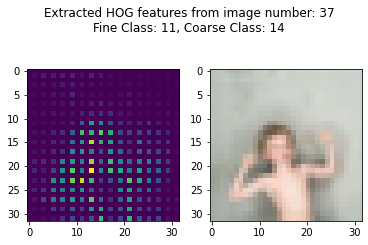

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01606389 0.         ... 0.00938872 0.         0.00432766]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01392732 0.         ... 0.02769236 0.         0.01290419]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00894422 0.         ... 0.02156199 0.         0.00686274]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01606389 0.         ... 0.00938872 0.         0.00432766]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01392732 0.         ... 0.02769236 0.         0.01290419]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00894422 0.         ... 0.02156199 0.         0.00686274]]


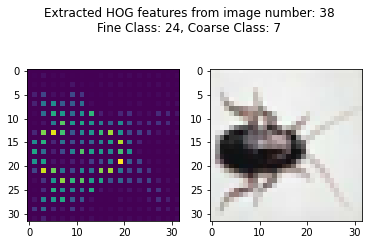

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00709418 0.         ... 0.00784314 0.         0.01090501]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.12256497 0.         ... 0.04614809 0.         0.02522321]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02072758 0.         ... 0.00960723 0.         0.0151011 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00709418 0.         ... 0.00784314 0.         0.01090501]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.12256497 0.         ... 0.04614809 0.         0.02522321]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02072758 0.         ... 0.00960723 0.         0.0151011 ]]


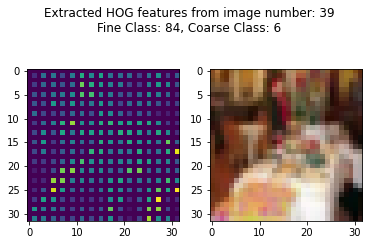

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07158154 0.         ... 0.10615935 0.         0.16182769]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.28427623 0.         ... 0.12063724 0.         0.0334267 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.23309448 0.         ... 0.23964823 0.         0.04342709]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07158154 0.         ... 0.10615935 0.         0.16182769]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.28427623 0.         ... 0.12063724 0.         0.0334267 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.23309448 0.         ... 0.23964823 0.         0.04342709]]


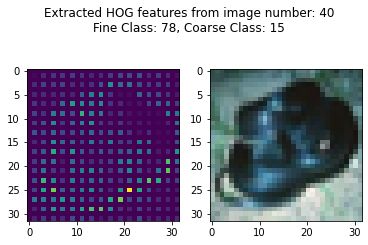

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01688191 0.         ... 0.09642256 0.         0.03369541]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.08081725 0.         ... 0.08871905 0.         0.08039067]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07239933 0.         ... 0.08612381 0.         0.09527198]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01688191 0.         ... 0.09642256 0.         0.03369541]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.08081725 0.         ... 0.08871905 0.         0.08039067]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07239933 0.         ... 0.08612381 0.         0.09527198]]


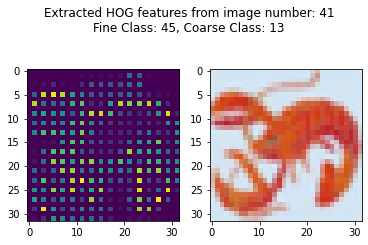

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.         0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.1336748  0.         ... 0.00840832 0.         0.00611379]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02535889 0.         ... 0.00196078 0.         0.00392157]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.         0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.1336748  0.         ... 0.00840832 0.         0.00611379]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02535889 0.         ... 0.00196078 0.         0.00392157]]


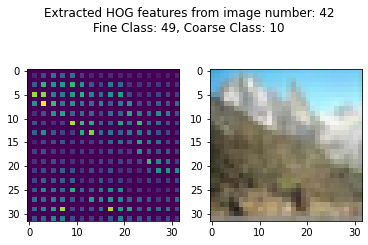

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0474893  0.         ... 0.03985974 0.         0.04532881]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.13540538 0.         ... 0.16277838 0.         0.09930652]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10231612 0.         ... 0.09186442 0.         0.0717363 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0474893  0.         ... 0.03985974 0.         0.04532881]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.13540538 0.         ... 0.16277838 0.         0.09930652]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10231612 0.         ... 0.09186442 0.         0.0717363 ]]


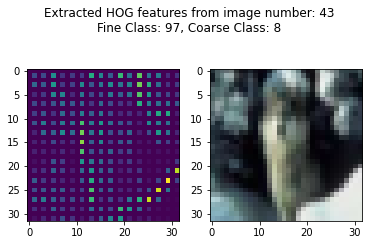

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.17743628 0.         ... 0.10366807 0.         0.11568628]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.10873195 0.         ... 0.01680511 0.         0.00816133]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0314102  0.         ... 0.01596606 0.         0.00294118]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.17743628 0.         ... 0.10366807 0.         0.11568628]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.10873195 0.         ... 0.01680511 0.         0.00816133]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0314102  0.         ... 0.01596606 0.         0.00294118]]


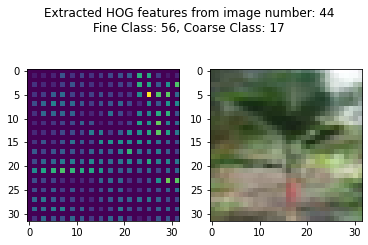

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03140519 0.         ... 0.03183686 0.         0.04764387]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.17220812 0.         ... 0.16513409 0.         0.13768538]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07379505 0.         ... 0.12674341 0.         0.10403944]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03140519 0.         ... 0.03183686 0.         0.04764387]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.17220812 0.         ... 0.16513409 0.         0.13768538]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07379505 0.         ... 0.12674341 0.         0.10403944]]


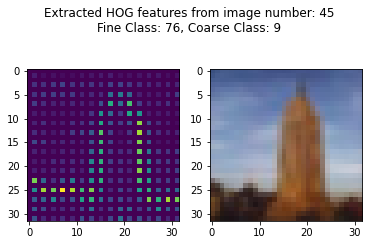

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04104517 0.         ... 0.0179442  0.         0.02400518]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.14243481 0.         ... 0.15250755 0.         0.13187994]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12864796 0.         ... 0.05309112 0.         0.07292511]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04104517 0.         ... 0.0179442  0.         0.02400518]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.14243481 0.         ... 0.15250755 0.         0.13187994]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12864796 0.         ... 0.05309112 0.         0.07292511]]


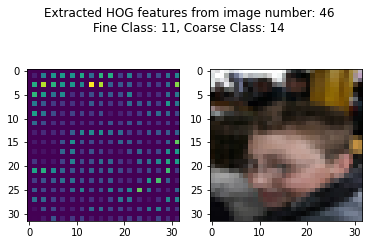

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06102856 0.         ... 0.284299   0.         0.3427803 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.03161674 0.         ... 0.18243097 0.         0.11735081]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00415301 0.         ... 0.08948856 0.         0.05510261]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06102856 0.         ... 0.284299   0.         0.3427803 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.03161674 0.         ... 0.18243097 0.         0.11735081]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00415301 0.         ... 0.08948856 0.         0.05510261]]


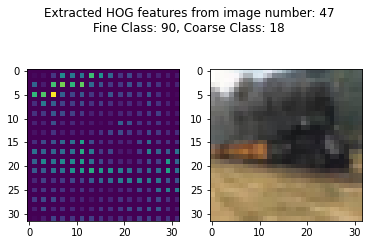

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0102668  0.         ... 0.03892961 0.         0.03122437]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04532528 0.         ... 0.07232724 0.         0.0396269 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00980392 0.         ... 0.07633704 0.         0.06132017]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0102668  0.         ... 0.03892961 0.         0.03122437]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04532528 0.         ... 0.07232724 0.         0.0396269 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00980392 0.         ... 0.07633704 0.         0.06132017]]


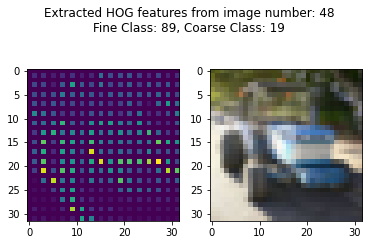

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0871048  0.         ... 0.06754615 0.         0.09268353]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05475782 0.         ... 0.03703476 0.         0.05213186]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0356057  0.         ... 0.01894998 0.         0.01785403]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0871048  0.         ... 0.06754615 0.         0.09268353]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05475782 0.         ... 0.03703476 0.         0.05213186]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0356057  0.         ... 0.01894998 0.         0.01785403]]


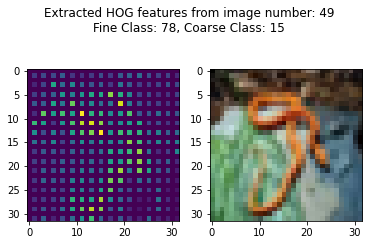

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11553374 0.         ... 0.1424481  0.         0.08061917]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.11479024 0.         ... 0.11107181 0.         0.03986978]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09930772 0.         ... 0.06181631 0.         0.02963877]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11553374 0.         ... 0.1424481  0.         0.08061917]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.11479024 0.         ... 0.11107181 0.         0.03986978]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09930772 0.         ... 0.06181631 0.         0.02963877]]


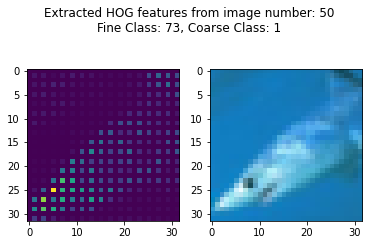

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03910641 0.         ... 0.20417974 0.         0.16556808]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.34306342 0.         ... 0.01698071 0.         0.01019446]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12673708 0.         ... 0.0115965  0.         0.00702184]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03910641 0.         ... 0.20417974 0.         0.16556808]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.34306342 0.         ... 0.01698071 0.         0.01019446]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12673708 0.         ... 0.0115965  0.         0.00702184]]


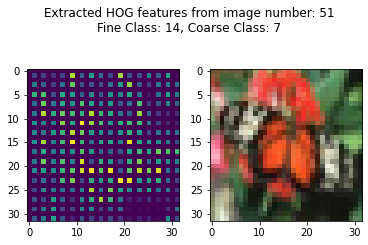

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13046106 0.         ... 0.37884928 0.         0.0226461 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.16972387 0.         ... 0.09312332 0.         0.25815534]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.19195734 0.         ... 0.3286634  0.         0.15138055]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13046106 0.         ... 0.37884928 0.         0.0226461 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.16972387 0.         ... 0.09312332 0.         0.25815534]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.19195734 0.         ... 0.3286634  0.         0.15138055]]


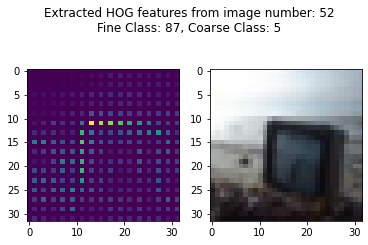

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00236688 0.         ... 0.03310152 0.         0.01672096]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.06414568 0.         ... 0.12269934 0.         0.12600706]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08079138 0.         ... 0.04163722 0.         0.0449054 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00236688 0.         ... 0.03310152 0.         0.01672096]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.06414568 0.         ... 0.12269934 0.         0.12600706]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08079138 0.         ... 0.04163722 0.         0.0449054 ]]


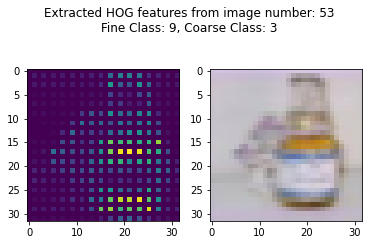

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03431372 0.         ... 0.0315119  0.         0.03094139]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.03554257 0.         ... 0.06207233 0.         0.04671811]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01088139 0.         ... 0.02137963 0.         0.01061858]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03431372 0.         ... 0.0315119  0.         0.03094139]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.03554257 0.         ... 0.06207233 0.         0.04671811]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01088139 0.         ... 0.02137963 0.         0.01061858]]


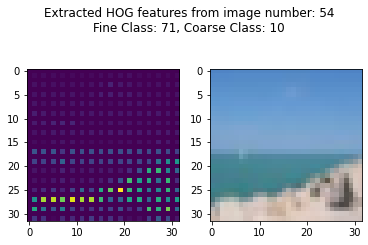

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01282624 0.         ... 0.01176471 0.         0.01176471]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.30337965 0.         ... 0.3954493  0.         0.18081835]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08091828 0.         ... 0.1148     0.         0.0317427 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01282624 0.         ... 0.01176471 0.         0.01176471]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.30337965 0.         ... 0.3954493  0.         0.18081835]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08091828 0.         ... 0.1148     0.         0.0317427 ]]


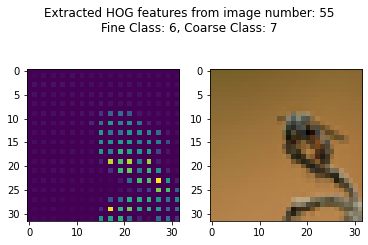

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00894422 0.         ... 0.01186178 0.         0.00980392]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00928641 0.         ... 0.18779975 0.         0.1975409 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00894422 0.         ... 0.1942881  0.         0.07713162]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00894422 0.         ... 0.01186178 0.         0.00980392]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00928641 0.         ... 0.18779975 0.         0.1975409 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00894422 0.         ... 0.1942881  0.         0.07713162]]


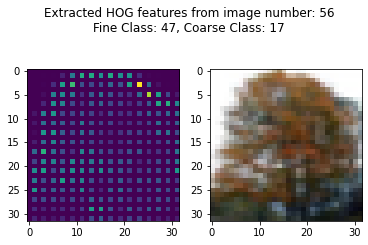

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00098039 0.         ... 0.00098039 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09560781 0.         ... 0.14508104 0.         0.06537183]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07550835 0.         ... 0.06400638 0.         0.05596066]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00098039 0.         ... 0.00098039 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09560781 0.         ... 0.14508104 0.         0.06537183]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07550835 0.         ... 0.06400638 0.         0.05596066]]


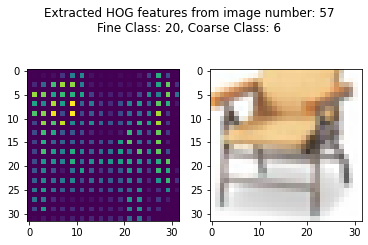

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00404226 0.         ... 0.15053801 0.         0.00490196]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.14419105 0.         ... 0.00553949 0.         0.00236688]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01194151 0.         ... 0.00277297 0.         0.00219222]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00404226 0.         ... 0.15053801 0.         0.00490196]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.14419105 0.         ... 0.00553949 0.         0.00236688]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01194151 0.         ... 0.00277297 0.         0.00219222]]


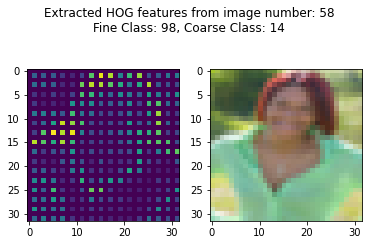

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15324462 0.         ... 0.19329613 0.         0.20451846]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.258293   0.         ... 0.13971978 0.         0.08350538]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16305932 0.         ... 0.11700887 0.         0.11582461]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15324462 0.         ... 0.19329613 0.         0.20451846]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.258293   0.         ... 0.13971978 0.         0.08350538]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16305932 0.         ... 0.11700887 0.         0.11582461]]


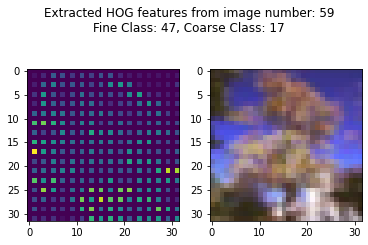

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02941177 0.         ... 0.03180314 0.         0.03630513]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.14887501 0.         ... 0.3466115  0.         0.21933237]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07847695 0.         ... 0.17953265 0.         0.28485541]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02941177 0.         ... 0.03180314 0.         0.03630513]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.14887501 0.         ... 0.3466115  0.         0.21933237]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07847695 0.         ... 0.17953265 0.         0.28485541]]


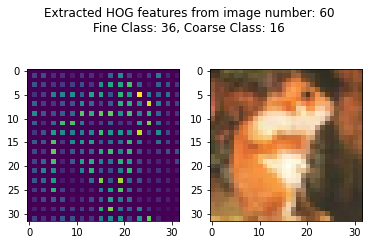

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12358539 0.         ... 0.07094818 0.         0.03529412]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05498824 0.         ... 0.0297617  0.         0.02020152]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12258822 0.         ... 0.01176471 0.         0.01676374]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12358539 0.         ... 0.07094818 0.         0.03529412]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05498824 0.         ... 0.0297617  0.         0.02020152]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12258822 0.         ... 0.01176471 0.         0.01676374]]


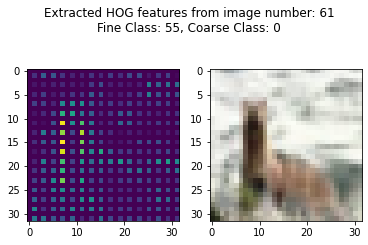

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09331176 0.         ... 0.13067483 0.         0.01431917]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.30646967 0.         ... 0.12833796 0.         0.12796503]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.27665178 0.         ... 0.09720019 0.         0.10008994]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09331176 0.         ... 0.13067483 0.         0.01431917]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.30646967 0.         ... 0.12833796 0.         0.12796503]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.27665178 0.         ... 0.09720019 0.         0.10008994]]


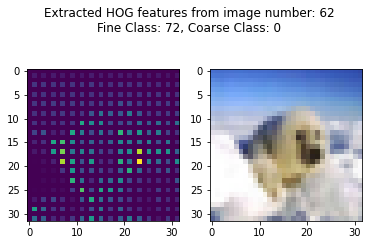

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04812817 0.         ... 0.03538617 0.         0.03816508]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.38813341 0.         ... 0.09994093 0.         0.06682749]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.24825415 0.         ... 0.11027973 0.         0.07627733]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04812817 0.         ... 0.03538617 0.         0.03816508]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.38813341 0.         ... 0.09994093 0.         0.06682749]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.24825415 0.         ... 0.11027973 0.         0.07627733]]


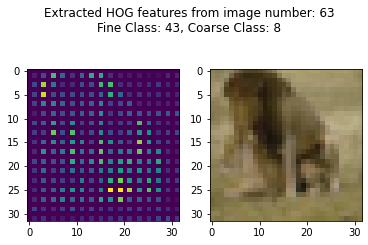

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02954191 0.         ... 0.0415329  0.         0.03531861]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.07083493 0.         ... 0.04397939 0.         0.02603967]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02957406 0.         ... 0.08602772 0.         0.05072415]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02954191 0.         ... 0.0415329  0.         0.03531861]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.07083493 0.         ... 0.04397939 0.         0.02603967]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02957406 0.         ... 0.08602772 0.         0.05072415]]


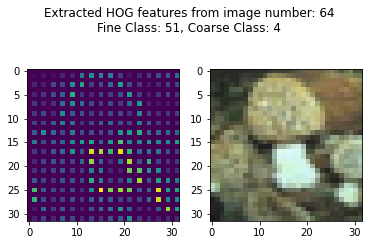

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01396687 0.         ... 0.1704878  0.         0.21279105]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04400106 0.         ... 0.53224285 0.         0.35681382]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05435205 0.         ... 0.07596771 0.         0.06829278]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01396687 0.         ... 0.1704878  0.         0.21279105]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04400106 0.         ... 0.53224285 0.         0.35681382]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05435205 0.         ... 0.07596771 0.         0.06829278]]


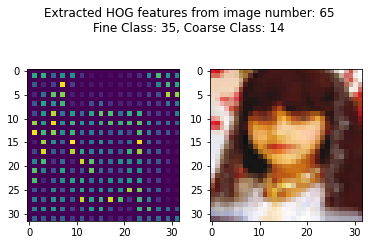

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.4383953  0.         ... 0.39201564 0.         0.33193883]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.31408906 0.         ... 0.27307156 0.         0.18494194]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.21877739 0.         ... 0.25057413 0.         0.2906681 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.4383953  0.         ... 0.39201564 0.         0.33193883]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.31408906 0.         ... 0.27307156 0.         0.18494194]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.21877739 0.         ... 0.25057413 0.         0.2906681 ]]


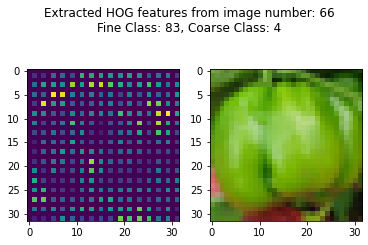

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06603989 0.         ... 0.18550404 0.         0.08453214]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.18233184 0.         ... 0.21700537 0.         0.04557819]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03454074 0.         ... 0.20027893 0.         0.05813297]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06603989 0.         ... 0.18550404 0.         0.08453214]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.18233184 0.         ... 0.21700537 0.         0.04557819]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03454074 0.         ... 0.20027893 0.         0.05813297]]


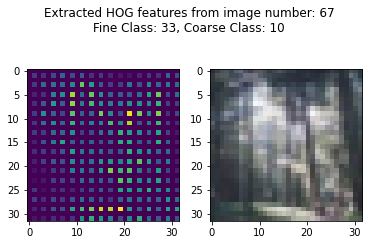

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07994218 0.         ... 0.15583104 0.         0.11412447]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0445515  0.         ... 0.28458881 0.         0.27733933]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02748863 0.         ... 0.19582222 0.         0.11765472]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07994218 0.         ... 0.15583104 0.         0.11412447]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0445515  0.         ... 0.28458881 0.         0.27733933]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02748863 0.         ... 0.19582222 0.         0.11765472]]


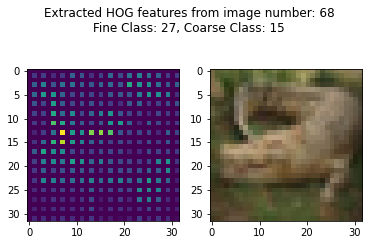

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07648199 0.         ... 0.08836558 0.         0.08572559]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04644996 0.         ... 0.05777819 0.         0.04457279]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0546944  0.         ... 0.05898089 0.         0.0149805 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07648199 0.         ... 0.08836558 0.         0.08572559]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04644996 0.         ... 0.05777819 0.         0.04457279]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0546944  0.         ... 0.05898089 0.         0.0149805 ]]


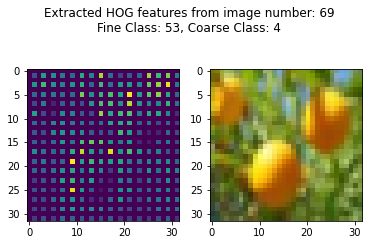

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1415992  0.         ... 0.4512433  0.         0.22919001]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.12166667 0.         ... 0.21542833 0.         0.19649035]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09653992 0.         ... 0.16392331 0.         0.08083137]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1415992  0.         ... 0.4512433  0.         0.22919001]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.12166667 0.         ... 0.21542833 0.         0.19649035]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09653992 0.         ... 0.16392331 0.         0.08083137]]


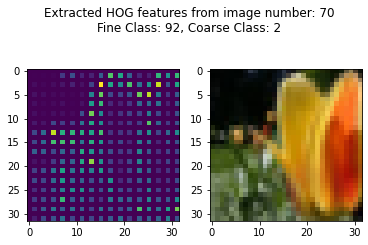

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00317262 0.         ... 0.34821793 0.         0.46120936]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.10215281 0.         ... 0.38757699 0.         0.54216015]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0553649  0.         ... 0.29717629 0.         0.17745589]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00317262 0.         ... 0.34821793 0.         0.46120936]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.10215281 0.         ... 0.38757699 0.         0.54216015]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0553649  0.         ... 0.29717629 0.         0.17745589]]


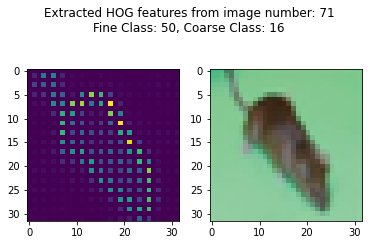

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05340412 0.         ... 0.00530805 0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00732562 0.         ... 0.00675132 0.         0.00709418]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00588235 0.         ... 0.00294118 0.         0.00392157]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05340412 0.         ... 0.00530805 0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00732562 0.         ... 0.00675132 0.         0.00709418]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00588235 0.         ... 0.00294118 0.         0.00392157]]


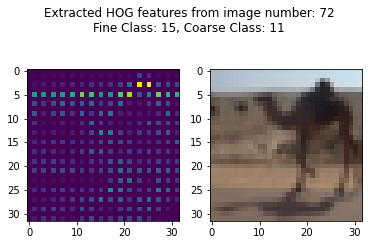

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00745642 0.         ... 0.0162447  0.         0.02204591]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.08065869 0.         ... 0.04258248 0.         0.01508349]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04199301 0.         ... 0.01406045 0.         0.01184584]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00745642 0.         ... 0.0162447  0.         0.02204591]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.08065869 0.         ... 0.04258248 0.         0.01508349]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04199301 0.         ... 0.01406045 0.         0.01184584]]


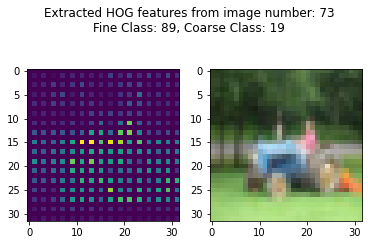

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02473682 0.         ... 0.11720187 0.         0.07247892]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.03606016 0.         ... 0.0742826  0.         0.08473383]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01666667 0.         ... 0.02595953 0.         0.03637744]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02473682 0.         ... 0.11720187 0.         0.07247892]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.03606016 0.         ... 0.0742826  0.         0.08473383]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01666667 0.         ... 0.02595953 0.         0.03637744]]


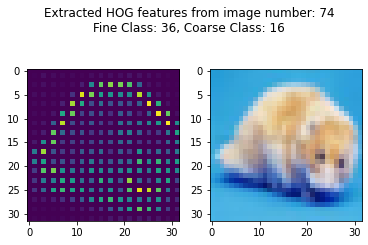

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00647603 0.         ... 0.00921406 0.         0.00432766]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01412071 0.         ... 0.1233618  0.         0.05200954]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00796383 0.         ... 0.02069604 0.         0.01284218]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00647603 0.         ... 0.00921406 0.         0.00432766]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01412071 0.         ... 0.1233618  0.         0.05200954]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00796383 0.         ... 0.02069604 0.         0.01284218]]


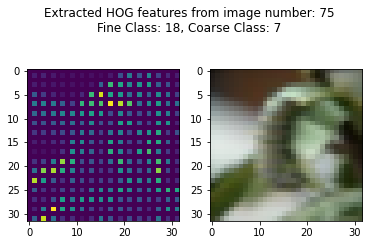

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04333789 0.         ... 0.06479944 0.         0.04375238]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05150441 0.         ... 0.26559272 0.         0.22332247]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16720422 0.         ... 0.07406157 0.         0.06356652]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04333789 0.         ... 0.06479944 0.         0.04375238]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05150441 0.         ... 0.26559272 0.         0.22332247]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16720422 0.         ... 0.07406157 0.         0.06356652]]


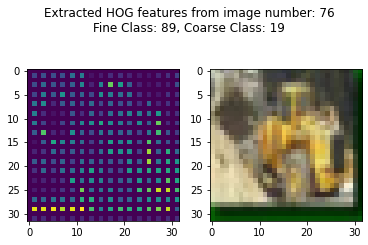

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13396752 0.         ... 0.08980799 0.         0.12648002]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.6225884  0.         ... 0.5924511  0.         0.20291075]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08169822 0.         ... 0.0821048  0.         0.08706315]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13396752 0.         ... 0.08980799 0.         0.12648002]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.6225884  0.         ... 0.5924511  0.         0.20291075]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08169822 0.         ... 0.0821048  0.         0.08706315]]


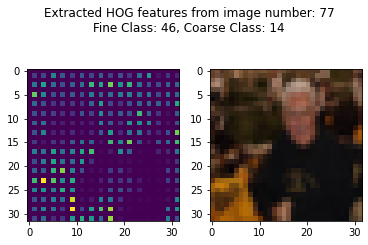

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09868833 0.         ... 0.08869787 0.         0.05704865]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.1693901  0.         ... 0.20783127 0.         0.27912576]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11910107 0.         ... 0.23717657 0.         0.13953106]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09868833 0.         ... 0.08869787 0.         0.05704865]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.1693901  0.         ... 0.20783127 0.         0.27912576]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11910107 0.         ... 0.23717657 0.         0.13953106]]


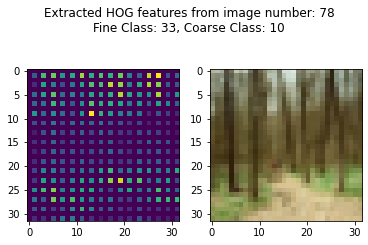

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11511157 0.         ... 0.09983028 0.         0.13483291]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.10730426 0.         ... 0.05838063 0.         0.06452411]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04888406 0.         ... 0.03300186 0.         0.04148806]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11511157 0.         ... 0.09983028 0.         0.13483291]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.10730426 0.         ... 0.05838063 0.         0.06452411]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04888406 0.         ... 0.03300186 0.         0.04148806]]


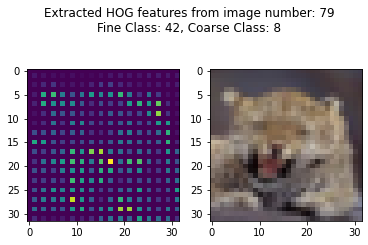

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02848028 0.         ... 0.03372596 0.         0.02945624]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.17309748 0.         ... 0.18416765 0.         0.14545741]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0587508  0.         ... 0.16929042 0.         0.06999616]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02848028 0.         ... 0.03372596 0.         0.02945624]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.17309748 0.         ... 0.18416765 0.         0.14545741]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0587508  0.         ... 0.16929042 0.         0.06999616]]


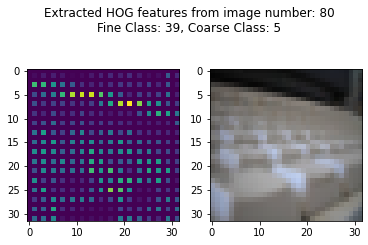

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01240868 0.         ... 0.11478207 0.         0.04668214]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.12630615 0.         ... 0.08578895 0.         0.13775324]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13675405 0.         ... 0.15901307 0.         0.09955716]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01240868 0.         ... 0.11478207 0.         0.04668214]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.12630615 0.         ... 0.08578895 0.         0.13775324]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13675405 0.         ... 0.15901307 0.         0.09955716]]


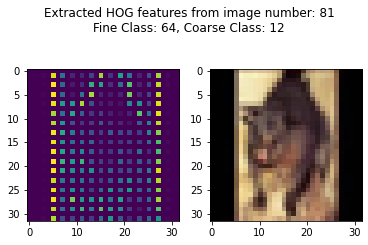

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00294118 0.         ... 0.01886884 0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00196078 0.         ... 0.01578335 0.         0.00196078]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.01245902 0.         0.00294118]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00294118 0.         ... 0.01886884 0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00196078 0.         ... 0.01578335 0.         0.00196078]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.01245902 0.         0.00294118]]


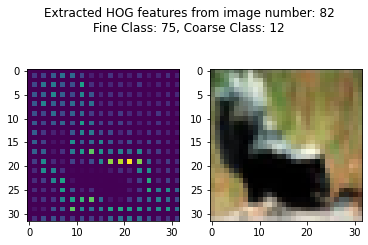

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12821036 0.         ... 0.11028795 0.         0.07055554]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04052228 0.         ... 0.44132574 0.         0.30511306]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1115387  0.         ... 0.1236341  0.         0.15080565]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12821036 0.         ... 0.11028795 0.         0.07055554]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04052228 0.         ... 0.44132574 0.         0.30511306]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1115387  0.         ... 0.1236341  0.         0.15080565]]


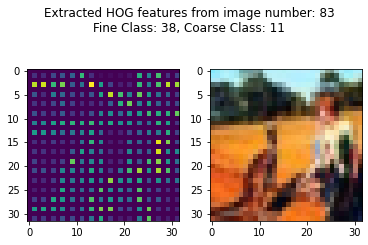

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10767465 0.         ... 0.12173212 0.         0.15491238]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.43125473 0.         ... 0.12067555 0.         0.08559731]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1331557  0.         ... 0.06282669 0.         0.0864078 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10767465 0.         ... 0.12173212 0.         0.15491238]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.43125473 0.         ... 0.12067555 0.         0.08559731]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1331557  0.         ... 0.06282669 0.         0.0864078 ]]


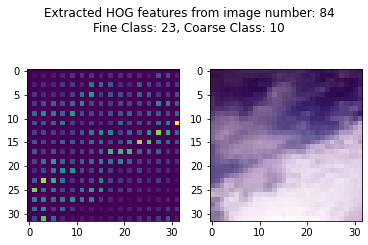

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01568627 0.         ... 0.09200772 0.         0.03639658]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.14214249 0.         ... 0.06422484 0.         0.06987514]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07210449 0.         ... 0.10103439 0.         0.02765948]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01568627 0.         ... 0.09200772 0.         0.03639658]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.14214249 0.         ... 0.06422484 0.         0.06987514]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07210449 0.         ... 0.10103439 0.         0.02765948]]


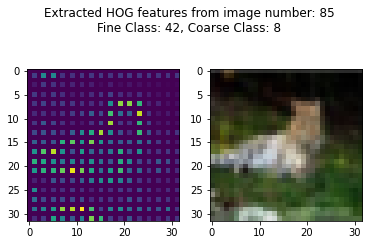

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09618335 0.         ... 0.07943627 0.         0.08559191]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.20144249 0.         ... 0.19976836 0.         0.08319397]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06805759 0.         ... 0.08611417 0.         0.08138297]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09618335 0.         ... 0.07943627 0.         0.08559191]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.20144249 0.         ... 0.19976836 0.         0.08319397]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06805759 0.         ... 0.08611417 0.         0.08138297]]


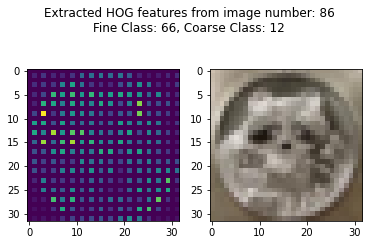

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04988295 0.         ... 0.05685615 0.         0.06387543]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02027119 0.         ... 0.03789106 0.         0.01866868]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01846172 0.         ... 0.024828   0.         0.02298069]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04988295 0.         ... 0.05685615 0.         0.06387543]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02027119 0.         ... 0.03789106 0.         0.01866868]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01846172 0.         ... 0.024828   0.         0.02298069]]


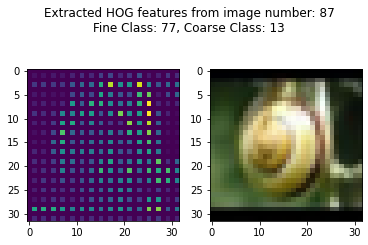

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02843137 0.         ... 0.10294118 0.         0.08137255]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.39015555 0.         ... 0.18650576 0.         0.25786439]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07647059 0.         ... 0.04705882 0.         0.06568628]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02843137 0.         ... 0.10294118 0.         0.08137255]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.39015555 0.         ... 0.18650576 0.         0.25786439]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07647059 0.         ... 0.04705882 0.         0.06568628]]


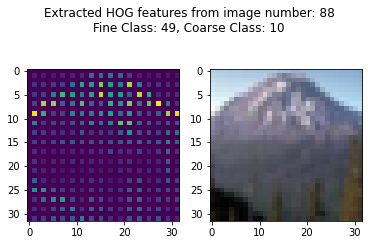

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03384723 0.         ... 0.02788933 0.         0.02686446]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05385092 0.         ... 0.05027174 0.         0.06014993]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0627647  0.         ... 0.05819373 0.         0.04019608]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03384723 0.         ... 0.02788933 0.         0.02686446]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05385092 0.         ... 0.05027174 0.         0.06014993]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0627647  0.         ... 0.05819373 0.         0.04019608]]


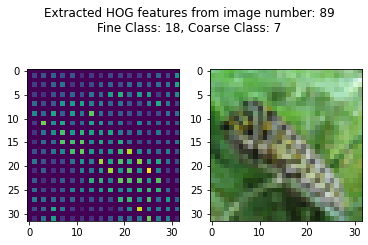

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10204589 0.         ... 0.11072623 0.         0.26193377]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.12358744 0.         ... 0.23252708 0.         0.17662483]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05961397 0.         ... 0.22853282 0.         0.04717377]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10204589 0.         ... 0.11072623 0.         0.26193377]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.12358744 0.         ... 0.23252708 0.         0.17662483]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05961397 0.         ... 0.22853282 0.         0.04717377]]


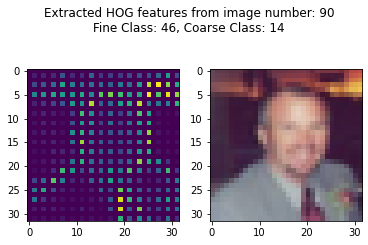

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03630948 0.         ... 0.26750989 0.         0.11321301]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0334948  0.         ... 0.18358735 0.         0.17065265]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01380663 0.         ... 0.18354142 0.         0.06282666]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03630948 0.         ... 0.26750989 0.         0.11321301]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0334948  0.         ... 0.18358735 0.         0.17065265]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01380663 0.         ... 0.18354142 0.         0.06282666]]


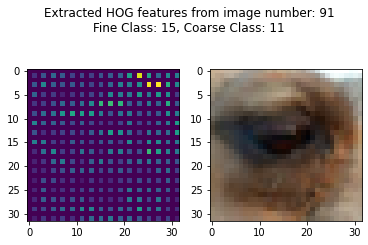

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05627525 0.         ... 0.18472938 0.         0.17156862]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.06852841 0.         ... 0.07560798 0.         0.05158624]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03158105 0.         ... 0.07901705 0.         0.03062359]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05627525 0.         ... 0.18472938 0.         0.17156862]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.06852841 0.         ... 0.07560798 0.         0.05158624]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03158105 0.         ... 0.07901705 0.         0.03062359]]


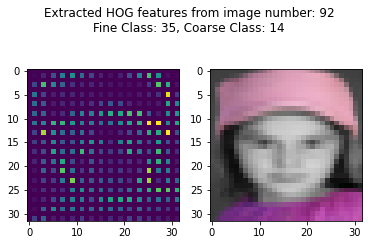

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00709419 0.         ... 0.02389985 0.         0.00830602]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01671016 0.         ... 0.09184634 0.         0.07893194]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11248953 0.         ... 0.03929796 0.         0.02804027]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00709419 0.         ... 0.02389985 0.         0.00830602]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01671016 0.         ... 0.09184634 0.         0.07893194]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11248953 0.         ... 0.03929796 0.         0.02804027]]


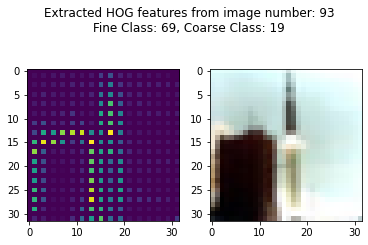

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01916079 0.         ... 0.0180826  0.         0.00451525]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.40533867 0.         ... 0.01759242 0.         0.01760202]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06240439 0.         ... 0.03146962 0.         0.10980392]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01916079 0.         ... 0.0180826  0.         0.00451525]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.40533867 0.         ... 0.01759242 0.         0.01760202]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06240439 0.         ... 0.03146962 0.         0.10980392]]


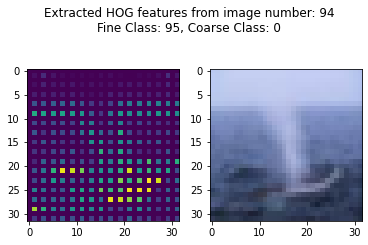

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0102668  0.         ... 0.03338763 0.         0.01478702]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.21216381 0.         ... 0.0665604  0.         0.07485117]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04090973 0.         ... 0.04316232 0.         0.04812816]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0102668  0.         ... 0.03338763 0.         0.01478702]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.21216381 0.         ... 0.0665604  0.         0.07485117]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04090973 0.         ... 0.04316232 0.         0.04812816]]


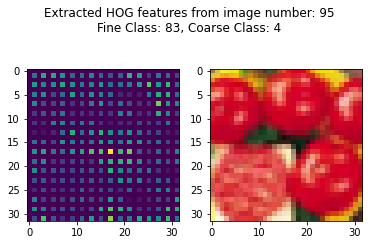

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.31520251 0.         ... 0.28738993 0.         0.17260557]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.40711561 0.         ... 0.55825871 0.         0.51456684]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.19071854 0.         ... 0.55516684 0.         0.30421733]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.31520251 0.         ... 0.28738993 0.         0.17260557]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.40711561 0.         ... 0.55825871 0.         0.51456684]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.19071854 0.         ... 0.55516684 0.         0.30421733]]


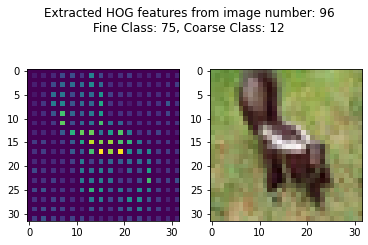

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04235751 0.         ... 0.06751487 0.         0.06666666]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.11972945 0.         ... 0.07620227 0.         0.06656258]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12063894 0.         ... 0.07761615 0.         0.06623537]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04235751 0.         ... 0.06751487 0.         0.06666666]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.11972945 0.         ... 0.07620227 0.         0.06656258]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12063894 0.         ... 0.07761615 0.         0.06623537]]


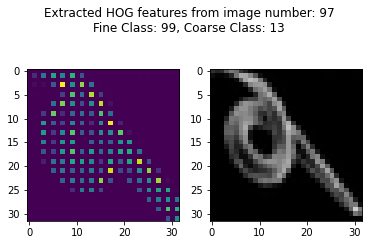

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08663047 0.         ... 0.00098039 0.         0.00334727]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.48215018 0.         0.41983045]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.1796301  0.         0.33585136]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08663047 0.         ... 0.00098039 0.         0.00334727]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.48215018 0.         0.41983045]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.1796301  0.         0.33585136]]


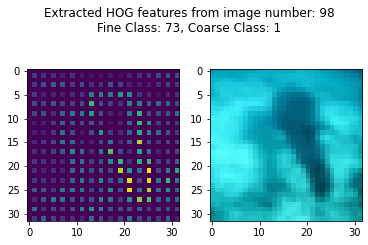

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0678229  0.         ... 0.10147159 0.         0.0955596 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.15690831 0.         ... 0.11713863 0.         0.08822879]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06259499 0.         ... 0.13270991 0.         0.03823529]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0678229  0.         ... 0.10147159 0.         0.0955596 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.15690831 0.         ... 0.11713863 0.         0.08822879]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06259499 0.         ... 0.13270991 0.         0.03823529]]


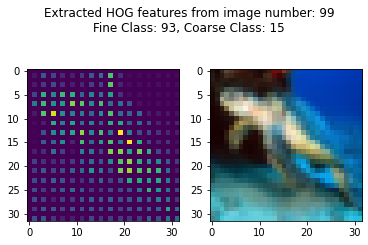

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04215686 0.         ... 0.02223336 0.         0.0154002 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.11989459 0.         ... 0.42228585 0.         0.24018752]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.17718555 0.         ... 0.26707395 0.         0.2334844 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04215686 0.         ... 0.02223336 0.         0.0154002 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.11989459 0.         ... 0.42228585 0.         0.24018752]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.17718555 0.         ... 0.26707395 0.         0.2334844 ]]


In [78]:

train_images_normalised = np.empty(images_reshaped.shape, dtype=float)

print(train_images_normalised.shape)

print(f'Images Shape: {images.shape}')
for image_index in range(0, 100):
    image = images[:, :, :, image_index]

    # Extract features from a single image
    _, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)
    
    plt.figure()
    plt.subplot(121)
    plt.imshow(hog_image)
    plt.subplot(122)
    plt.imshow(image)
    plt.suptitle(f'Extracted HOG features from image number: {image_index}\nFine Class: {label_fine[image_index]}, Coarse Class: {label_coarse[image_index]}')
    plt.show(block=False)
    
    print(hog_image)
    
    train_images_normalised[image_index] = hog_image
    
    print(train_images_normalised[image_index])
    

normalise test data

(10000, 32, 32)


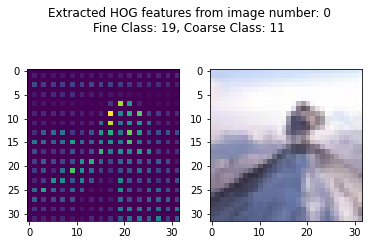

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04521298 0.         ... 0.05611777 0.         0.06156113]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.08530456 0.         ... 0.14217369 0.         0.20652512]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05456728 0.         ... 0.09343634 0.         0.15697937]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04521298 0.         ... 0.05611777 0.         0.06156113]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.08530456 0.         ... 0.14217369 0.         0.20652512]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05456728 0.         ... 0.09343634 0.         0.15697937]]


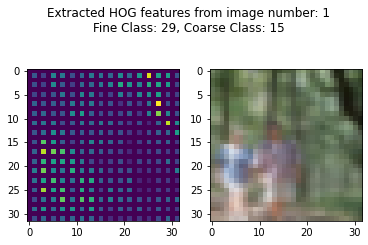

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11492586 0.         ... 0.23311405 0.         0.10532761]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.15059458 0.         ... 0.08375339 0.         0.0738932 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09743597 0.         ... 0.13500496 0.         0.08639684]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11492586 0.         ... 0.23311405 0.         0.10532761]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.15059458 0.         ... 0.08375339 0.         0.0738932 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09743597 0.         ... 0.13500496 0.         0.08639684]]


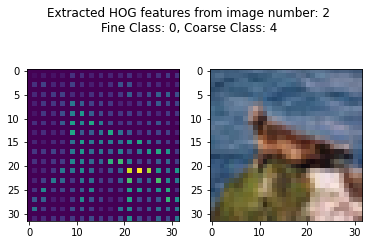

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02247882 0.         ... 0.11772086 0.         0.09860051]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.26084964 0.         ... 0.2378586  0.         0.28130138]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06746215 0.         ... 0.15002712 0.         0.28538857]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02247882 0.         ... 0.11772086 0.         0.09860051]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.26084964 0.         ... 0.2378586  0.         0.28130138]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06746215 0.         ... 0.15002712 0.         0.28538857]]


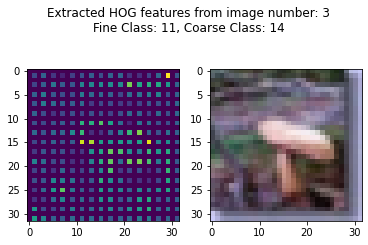

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12027621 0.         ... 0.55746654 0.         0.14718772]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.29612704 0.         ... 0.21520321 0.         0.17558888]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.31675417 0.         ... 0.18052077 0.         0.14405342]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12027621 0.         ... 0.55746654 0.         0.14718772]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.29612704 0.         ... 0.21520321 0.         0.17558888]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.31675417 0.         ... 0.18052077 0.         0.14405342]]


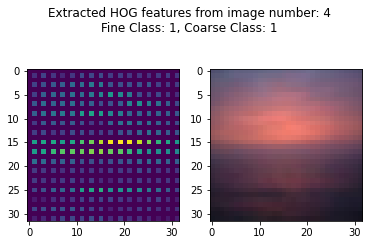

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03362457 0.         ... 0.04434049 0.         0.03861252]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05273384 0.         ... 0.03038537 0.         0.03346337]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0207952  0.         ... 0.01633025 0.         0.01981481]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03362457 0.         ... 0.04434049 0.         0.03861252]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05273384 0.         ... 0.03038537 0.         0.03346337]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0207952  0.         ... 0.01633025 0.         0.01981481]]


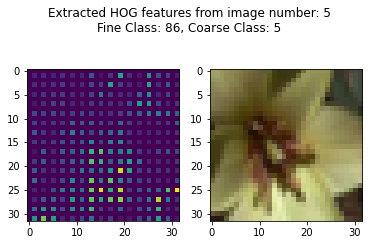

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05015244 0.         ... 0.1018302  0.         0.04052063]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.20040137 0.         ... 0.06088684 0.         0.06456228]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.28802788 0.         ... 0.15489928 0.         0.03256818]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05015244 0.         ... 0.1018302  0.         0.04052063]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.20040137 0.         ... 0.06088684 0.         0.06456228]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.28802788 0.         ... 0.15489928 0.         0.03256818]]


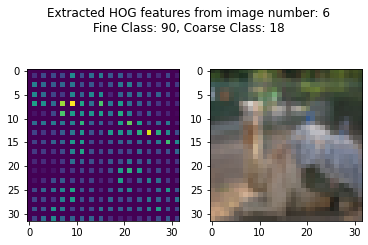

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05980393 0.         ... 0.0946695  0.         0.02968512]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.11900666 0.         ... 0.12214072 0.         0.09813226]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09122312 0.         ... 0.12241883 0.         0.08643112]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05980393 0.         ... 0.0946695  0.         0.02968512]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.11900666 0.         ... 0.12214072 0.         0.09813226]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09122312 0.         ... 0.12241883 0.         0.08643112]]


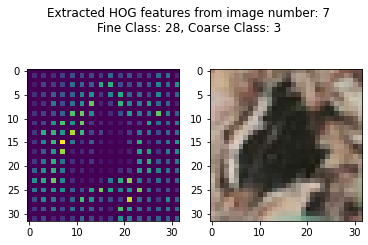

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07174543 0.         ... 0.22107646 0.         0.0635487 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09737192 0.         ... 0.24069185 0.         0.22198104]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0787059  0.         ... 0.17515239 0.         0.1880876 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07174543 0.         ... 0.22107646 0.         0.0635487 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09737192 0.         ... 0.24069185 0.         0.22198104]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0787059  0.         ... 0.17515239 0.         0.1880876 ]]


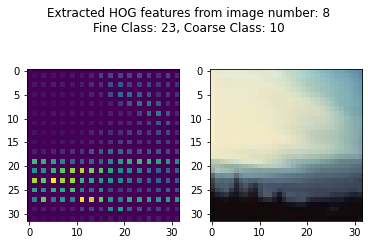

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00992461 0.         ... 0.06523651 0.         0.03942095]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02086508 0.         ... 0.03952157 0.         0.03408929]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0103976  0.         ... 0.01333878 0.         0.01372549]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00992461 0.         ... 0.06523651 0.         0.03942095]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02086508 0.         ... 0.03952157 0.         0.03408929]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0103976  0.         ... 0.01333878 0.         0.01372549]]


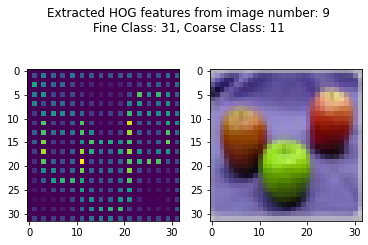

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15063614 0.         ... 0.22460241 0.         0.19486398]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.08647726 0.         ... 0.04397543 0.         0.18243118]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12541783 0.         ... 0.14578764 0.         0.12931859]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15063614 0.         ... 0.22460241 0.         0.19486398]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.08647726 0.         ... 0.04397543 0.         0.18243118]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12541783 0.         ... 0.14578764 0.         0.12931859]]


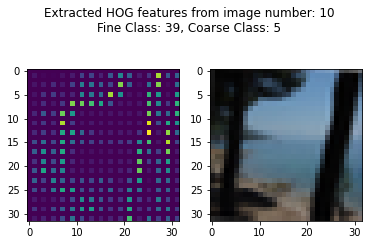

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03555164 0.         ... 0.1688498  0.         0.19781744]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09994855 0.         ... 0.24331943 0.         0.10830723]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03925334 0.         ... 0.18504249 0.         0.12217658]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03555164 0.         ... 0.1688498  0.         0.19781744]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09994855 0.         ... 0.24331943 0.         0.10830723]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03925334 0.         ... 0.18504249 0.         0.12217658]]


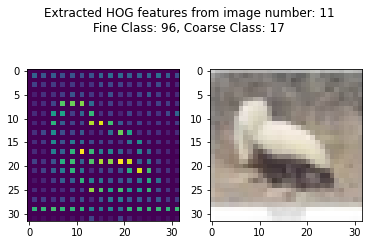

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14651672 0.         ... 0.14100083 0.         0.10988869]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.30876899 0.         ... 0.30514282 0.         0.31769937]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0127451  0.         ... 0.02162293 0.         0.01764706]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14651672 0.         ... 0.14100083 0.         0.10988869]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.30876899 0.         ... 0.30514282 0.         0.31769937]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0127451  0.         ... 0.02162293 0.         0.01764706]]


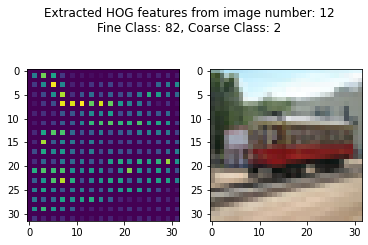

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.25364605 0.         ... 0.06126537 0.         0.03812984]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.29967497 0.         ... 0.08188105 0.         0.07139539]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09212416 0.         ... 0.04159752 0.         0.05945774]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.25364605 0.         ... 0.06126537 0.         0.03812984]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.29967497 0.         ... 0.08188105 0.         0.07139539]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09212416 0.         ... 0.04159752 0.         0.05945774]]


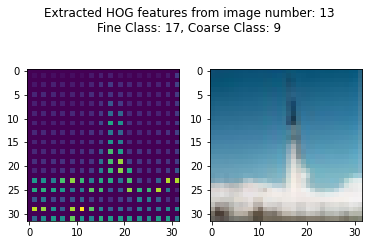

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01312271 0.         ... 0.02485712 0.         0.0679216 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.35808593 0.         ... 0.18860988 0.         0.19016238]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13239294 0.         ... 0.22190236 0.         0.17158994]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01312271 0.         ... 0.02485712 0.         0.0679216 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.35808593 0.         ... 0.18860988 0.         0.19016238]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13239294 0.         ... 0.22190236 0.         0.17158994]]


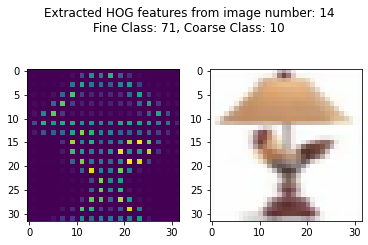

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00611379 0.         ... 0.00196078 0.         0.00611379]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00604145 0.         ... 0.00196078 0.         0.00604145]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00611379 0.         ... 0.00236688 0.         0.00611379]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00611379 0.         ... 0.00196078 0.         0.00611379]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00604145 0.         ... 0.00196078 0.         0.00604145]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00611379 0.         ... 0.00236688 0.         0.00611379]]


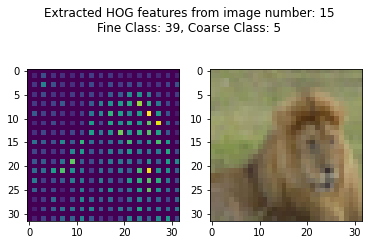

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02579775 0.         ... 0.03484379 0.         0.02352941]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0236156  0.         ... 0.0946644  0.         0.10561257]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0247183  0.         ... 0.14611474 0.         0.06225011]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02579775 0.         ... 0.03484379 0.         0.02352941]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0236156  0.         ... 0.0946644  0.         0.10561257]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0247183  0.         ... 0.14611474 0.         0.06225011]]


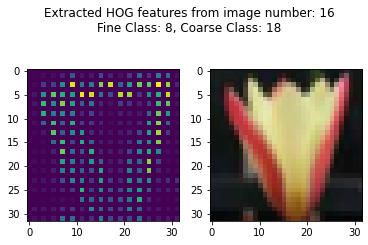

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00865532 0.         ... 0.26377946 0.         0.03335464]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0490196  0.         ... 0.03177864 0.         0.0343487 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03137255 0.         ... 0.05491947 0.         0.05296003]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00865532 0.         ... 0.26377946 0.         0.03335464]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0490196  0.         ... 0.03177864 0.         0.0343487 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03137255 0.         ... 0.05491947 0.         0.05296003]]


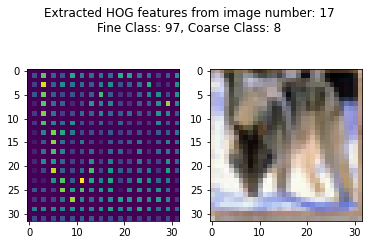

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16984946 0.         ... 0.19197264 0.         0.34412021]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.28531699 0.         ... 0.31557958 0.         0.22373522]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15282841 0.         ... 0.15153623 0.         0.07172035]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16984946 0.         ... 0.19197264 0.         0.34412021]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.28531699 0.         ... 0.31557958 0.         0.22373522]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.15282841 0.         ... 0.15153623 0.         0.07172035]]


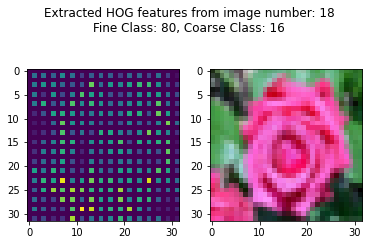

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.28464682 0.         ... 0.14457283 0.         0.03047358]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.31437671 0.         ... 0.07227817 0.         0.08694069]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14168859 0.         ... 0.06776323 0.         0.04797227]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.28464682 0.         ... 0.14457283 0.         0.03047358]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.31437671 0.         ... 0.07227817 0.         0.08694069]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14168859 0.         ... 0.06776323 0.         0.04797227]]


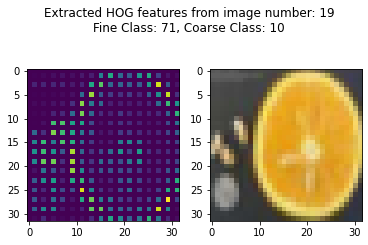

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00604145 0.         ... 0.04120097 0.         0.02247881]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.21045012 0.         ... 0.31107535 0.         0.02234335]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01376996 0.         ... 0.0799695  0.         0.02106553]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00604145 0.         ... 0.04120097 0.         0.02247881]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.21045012 0.         ... 0.31107535 0.         0.02234335]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01376996 0.         ... 0.0799695  0.         0.02106553]]


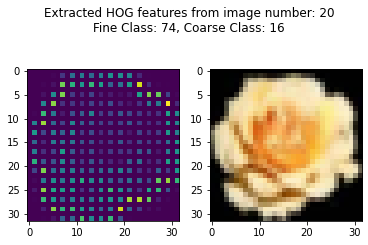

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00219222 0.         ... 0.00294118 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00219222 0.         ... 0.00294118 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


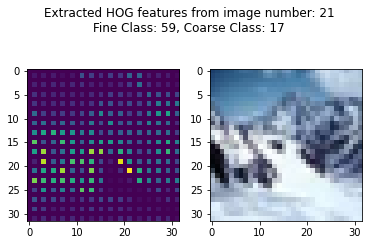

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04520096 0.         ... 0.0567967  0.         0.01965674]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.16019073 0.         ... 0.01643269 0.         0.0216383 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05897347 0.         ... 0.08487322 0.         0.02282364]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04520096 0.         ... 0.0567967  0.         0.01965674]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.16019073 0.         ... 0.01643269 0.         0.0216383 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05897347 0.         ... 0.08487322 0.         0.02282364]]


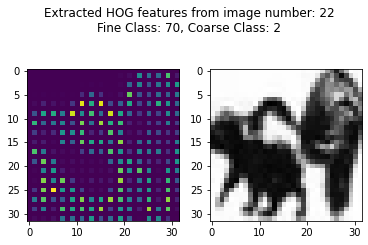

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00196078 0.         ... 0.69227993 0.         0.06799078]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.18907796 0.         ... 0.73118852 0.         0.03443442]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0256812  0.         ... 0.14104602 0.         0.00432766]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00196078 0.         ... 0.69227993 0.         0.06799078]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.18907796 0.         ... 0.73118852 0.         0.03443442]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0256812  0.         ... 0.14104602 0.         0.00432766]]


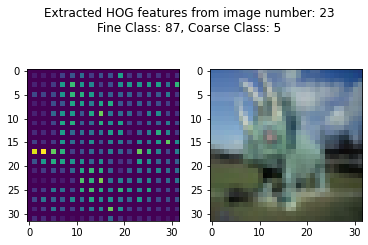

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03192178 0.         ... 0.04306948 0.         0.05990685]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0476023  0.         ... 0.06636935 0.         0.05321947]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05800604 0.         ... 0.02529031 0.         0.02748863]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03192178 0.         ... 0.04306948 0.         0.05990685]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0476023  0.         ... 0.06636935 0.         0.05321947]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05800604 0.         ... 0.02529031 0.         0.02748863]]


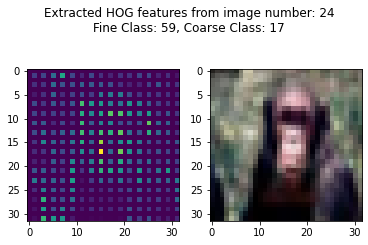

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12488069 0.         ... 0.09669862 0.         0.04042395]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.03356477 0.         ... 0.06205579 0.         0.14380244]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02457948 0.         ... 0.05537132 0.         0.07822064]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12488069 0.         ... 0.09669862 0.         0.04042395]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.03356477 0.         ... 0.06205579 0.         0.14380244]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02457948 0.         ... 0.05537132 0.         0.07822064]]


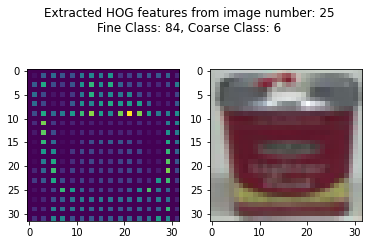

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02342396 0.         ... 0.20146272 0.         0.06942253]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.07516197 0.         ... 0.41846393 0.         0.07723358]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08698172 0.         ... 0.29810132 0.         0.0795308 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02342396 0.         ... 0.20146272 0.         0.06942253]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.07516197 0.         ... 0.41846393 0.         0.07723358]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08698172 0.         ... 0.29810132 0.         0.0795308 ]]


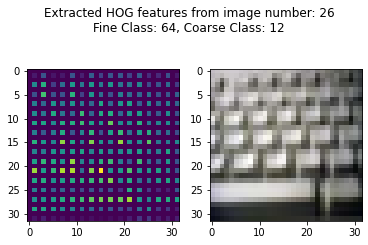

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04235582 0.         ... 0.15981845 0.         0.04315307]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.38177088 0.         ... 0.10468602 0.         0.05373061]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03630332 0.         ... 0.04903103 0.         0.05326574]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04235582 0.         ... 0.15981845 0.         0.04315307]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.38177088 0.         ... 0.10468602 0.         0.05373061]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03630332 0.         ... 0.04903103 0.         0.05326574]]


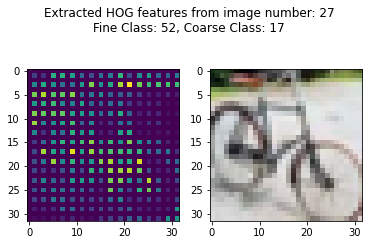

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11491843 0.         ... 0.18999738 0.         0.24543476]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0481243  0.         ... 0.0527346  0.         0.3203985 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01568627 0.         ... 0.30034635 0.         0.30733281]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11491843 0.         ... 0.18999738 0.         0.24543476]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0481243  0.         ... 0.0527346  0.         0.3203985 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01568627 0.         ... 0.30034635 0.         0.30733281]]


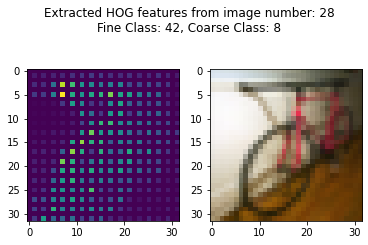

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04607843 0.         ... 0.07103876 0.         0.04433701]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.12706298 0.         ... 0.04760082 0.         0.02949019]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10314454 0.         ... 0.06346864 0.         0.00865532]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04607843 0.         ... 0.07103876 0.         0.04433701]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.12706298 0.         ... 0.04760082 0.         0.02949019]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10314454 0.         ... 0.06346864 0.         0.00865532]]


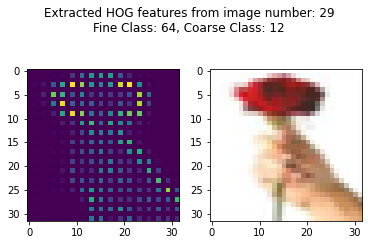

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.00098039 0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00490196 0.         ... 0.10780085 0.         0.2170902 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.11755003 0.         0.08236875]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.00098039 0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00490196 0.         ... 0.10780085 0.         0.2170902 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00392157 0.         ... 0.11755003 0.         0.08236875]]


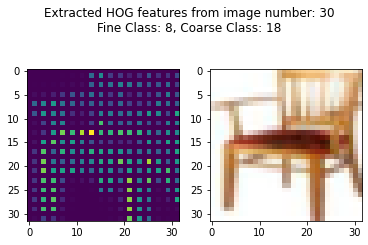

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.11648059 0.         0.17483409]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09834837 0.         ... 0.01302488 0.         0.02099433]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01306329 0.         ... 0.00681523 0.         0.00588235]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.11648059 0.         0.17483409]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09834837 0.         ... 0.01302488 0.         0.02099433]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01306329 0.         ... 0.00681523 0.         0.00588235]]


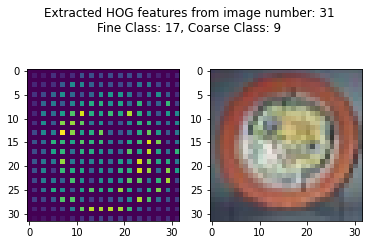

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02806878 0.         ... 0.03314017 0.         0.04039568]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04030131 0.         ... 0.07564314 0.         0.04778804]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01186178 0.         ... 0.05398476 0.         0.02465975]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02806878 0.         ... 0.03314017 0.         0.04039568]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04030131 0.         ... 0.07564314 0.         0.04778804]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01186178 0.         ... 0.05398476 0.         0.02465975]]


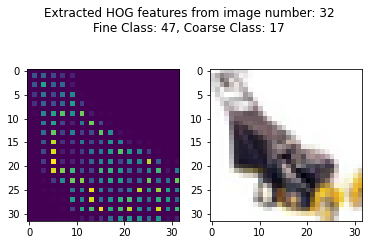

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.19158492 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.34325903 0.         0.49648379]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.02297688 0.         0.06862745]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.19158492 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.34325903 0.         0.49648379]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.02297688 0.         0.06862745]]


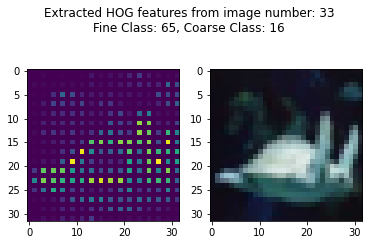

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00473375 0.         ... 0.01101575 0.         0.0204225 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00392157 0.         ... 0.03556661 0.         0.00980392]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00490196 0.         ... 0.01003536 0.         0.00980392]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00473375 0.         ... 0.01101575 0.         0.0204225 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00392157 0.         ... 0.03556661 0.         0.00980392]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00490196 0.         ... 0.01003536 0.         0.00980392]]


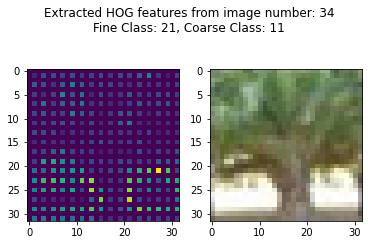

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06199171 0.         ... 0.04568041 0.         0.11667667]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.272354   0.         ... 0.37350959 0.         0.36575823]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.22235358 0.         ... 0.10507763 0.         0.10037317]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06199171 0.         ... 0.04568041 0.         0.11667667]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.272354   0.         ... 0.37350959 0.         0.36575823]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.22235358 0.         ... 0.10507763 0.         0.10037317]]


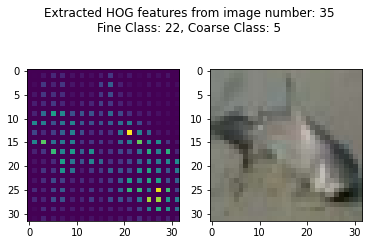

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00294119 0.         ... 0.02040224 0.         0.00196078]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00855753 0.         ... 0.20087163 0.         0.14006321]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00669702 0.         ... 0.0353926  0.         0.01804228]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00294119 0.         ... 0.02040224 0.         0.00196078]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00855753 0.         ... 0.20087163 0.         0.14006321]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00669702 0.         ... 0.0353926  0.         0.01804228]]


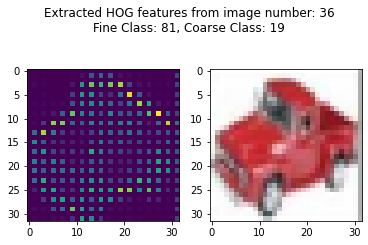

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00830602 0.         ... 0.00694388 0.         0.15513378]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01944211 0.         ... 0.00941721 0.         0.16179503]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0127451  0.         ... 0.00502265 0.         0.15500508]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00830602 0.         ... 0.00694388 0.         0.15513378]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01944211 0.         ... 0.00941721 0.         0.16179503]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0127451  0.         ... 0.00502265 0.         0.15500508]]


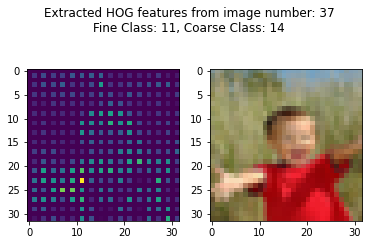

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10040128 0.         ... 0.04700804 0.         0.04316304]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.12391892 0.         ... 0.32503305 0.         0.07244812]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03158779 0.         ... 0.40963639 0.         0.12117071]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10040128 0.         ... 0.04700804 0.         0.04316304]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.12391892 0.         ... 0.32503305 0.         0.07244812]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03158779 0.         ... 0.40963639 0.         0.12117071]]


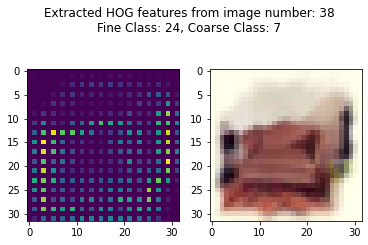

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00767493 0.         ... 0.00686274 0.         0.00490196]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.16995573 0.         ... 0.03459383 0.         0.00196078]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05658825 0.         ... 0.01078431 0.         0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00767493 0.         ... 0.00686274 0.         0.00490196]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.16995573 0.         ... 0.03459383 0.         0.00196078]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05658825 0.         ... 0.01078431 0.         0.        ]]


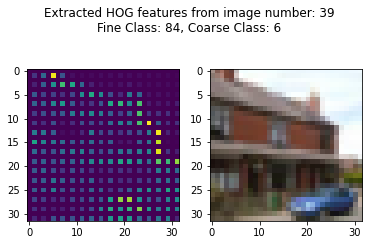

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10149958 0.         ... 0.0140266  0.         0.00941721]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09686154 0.         ... 0.33668727 0.         0.29756065]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07354383 0.         ... 0.2875815  0.         0.07526892]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10149958 0.         ... 0.0140266  0.         0.00941721]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09686154 0.         ... 0.33668727 0.         0.29756065]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07354383 0.         ... 0.2875815  0.         0.07526892]]


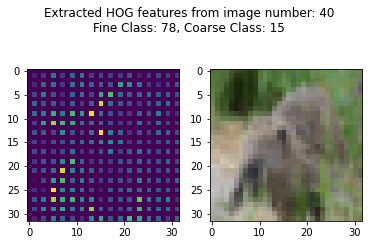

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03418242 0.         ... 0.07822307 0.         0.06537406]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09208992 0.         ... 0.14769872 0.         0.09142107]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03942095 0.         ... 0.07009062 0.         0.12822063]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03418242 0.         ... 0.07822307 0.         0.06537406]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09208992 0.         ... 0.14769872 0.         0.09142107]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03942095 0.         ... 0.07009062 0.         0.12822063]]


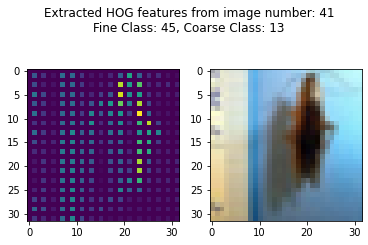

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1956489  0.         ... 0.03236995 0.         0.02021154]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.22952804 0.         ... 0.05066224 0.         0.04215687]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1156403  0.         ... 0.03560634 0.         0.02357388]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1956489  0.         ... 0.03236995 0.         0.02021154]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.22952804 0.         ... 0.05066224 0.         0.04215687]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1156403  0.         ... 0.03560634 0.         0.02357388]]


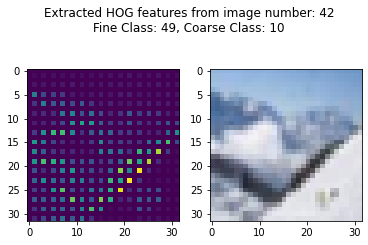

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01666667 0.         ... 0.02546438 0.         0.02080347]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.1042581  0.         ... 0.02687211 0.         0.0177282 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07098746 0.         ... 0.01882161 0.         0.01749888]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01666667 0.         ... 0.02546438 0.         0.02080347]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.1042581  0.         ... 0.02687211 0.         0.0177282 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07098746 0.         ... 0.01882161 0.         0.01749888]]


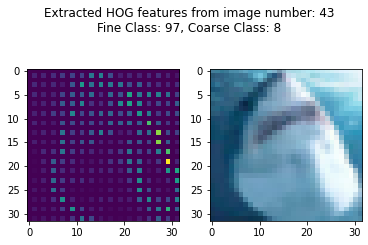

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06887138 0.         ... 0.06421088 0.         0.03980475]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04594714 0.         ... 0.45888446 0.         0.21707953]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02433005 0.         ... 0.12702667 0.         0.03749883]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06887138 0.         ... 0.06421088 0.         0.03980475]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04594714 0.         ... 0.45888446 0.         0.21707953]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02433005 0.         ... 0.12702667 0.         0.03749883]]


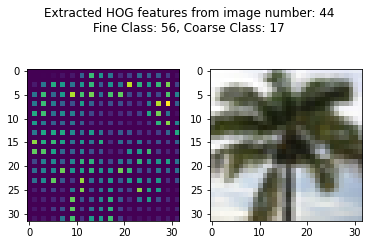

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00236688 0.         ... 0.12836188 0.         0.02569083]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04359479 0.         ... 0.04994748 0.         0.0738081 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03763213 0.         ... 0.05050652 0.         0.05369581]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00236688 0.         ... 0.12836188 0.         0.02569083]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04359479 0.         ... 0.04994748 0.         0.0738081 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03763213 0.         ... 0.05050652 0.         0.05369581]]


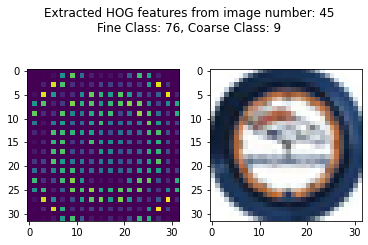

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00975888 0.         0.00098039]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00882353 0.         ... 0.16824448 0.         0.0152298 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00098039 0.         ... 0.01675285 0.         0.00098039]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.00975888 0.         0.00098039]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00882353 0.         ... 0.16824448 0.         0.0152298 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00098039 0.         ... 0.01675285 0.         0.00098039]]


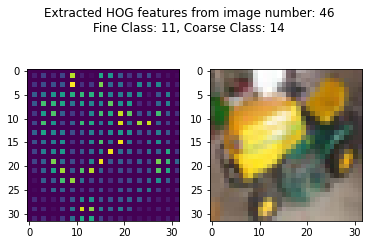

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0544999  0.         ... 0.0298328  0.         0.01436946]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.08199572 0.         ... 0.05209483 0.         0.03349463]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06472338 0.         ... 0.04918334 0.         0.03583957]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0544999  0.         ... 0.0298328  0.         0.01436946]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.08199572 0.         ... 0.05209483 0.         0.03349463]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06472338 0.         ... 0.04918334 0.         0.03583957]]


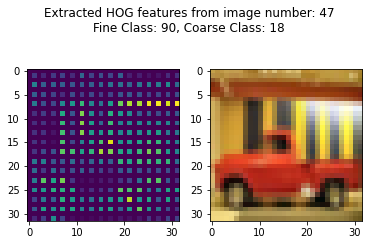

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12395755 0.         ... 0.0935503  0.         0.1059472 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.20974023 0.         ... 0.18449914 0.         0.11639316]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08435727 0.         ... 0.14779728 0.         0.14527526]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12395755 0.         ... 0.0935503  0.         0.1059472 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.20974023 0.         ... 0.18449914 0.         0.11639316]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08435727 0.         ... 0.14779728 0.         0.14527526]]


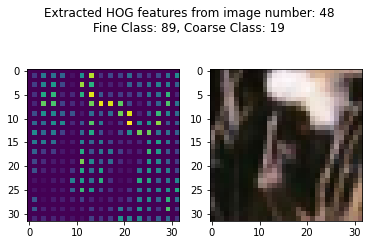

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1010204  0.         ... 0.23193567 0.         0.29690719]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.17436252 0.         ... 0.45078991 0.         0.12969404]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06796525 0.         ... 0.21442495 0.         0.0949077 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1010204  0.         ... 0.23193567 0.         0.29690719]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.17436252 0.         ... 0.45078991 0.         0.12969404]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06796525 0.         ... 0.21442495 0.         0.0949077 ]]


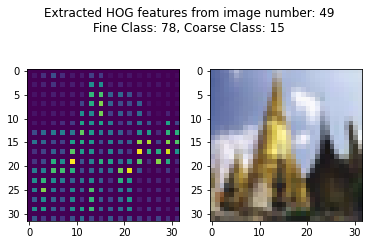

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03933063 0.         ... 0.01829929 0.         0.01638059]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.33430815 0.         ... 0.04607194 0.         0.08919995]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.19039746 0.         ... 0.09210972 0.         0.0758959 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03933063 0.         ... 0.01829929 0.         0.01638059]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.33430815 0.         ... 0.04607194 0.         0.08919995]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.19039746 0.         ... 0.09210972 0.         0.0758959 ]]


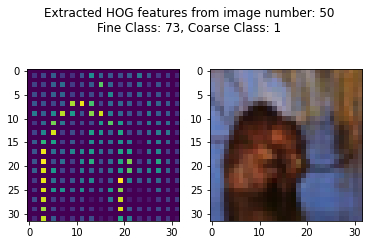

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07330367 0.         ... 0.09306454 0.         0.05376504]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.08541212 0.         ... 0.1048877  0.         0.06994621]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05701986 0.         ... 0.07784843 0.         0.02352941]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07330367 0.         ... 0.09306454 0.         0.05376504]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.08541212 0.         ... 0.1048877  0.         0.06994621]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05701986 0.         ... 0.07784843 0.         0.02352941]]


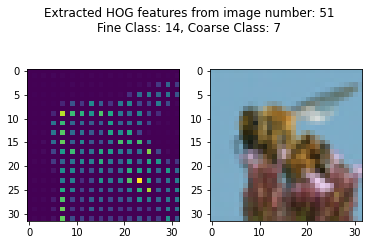

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00604145 0.         ... 0.00702184 0.         0.00894422]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01062904 0.         ... 0.27916954 0.         0.24958244]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00898262 0.         ... 0.33682033 0.         0.19901961]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00604145 0.         ... 0.00702184 0.         0.00894422]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01062904 0.         ... 0.27916954 0.         0.24958244]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00898262 0.         ... 0.33682033 0.         0.19901961]]


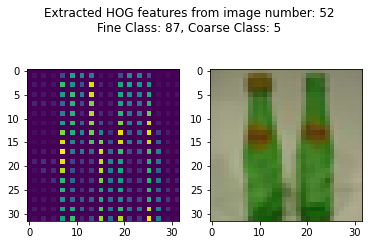

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01942181 0.         ... 0.01310367 0.         0.00702184]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02750045 0.         ... 0.05786468 0.         0.00980392]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01116193 0.         ... 0.0142798  0.         0.01078431]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01942181 0.         ... 0.01310367 0.         0.00702184]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02750045 0.         ... 0.05786468 0.         0.00980392]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01116193 0.         ... 0.0142798  0.         0.01078431]]


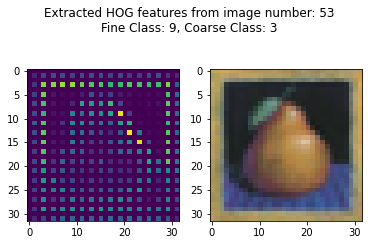

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06315079 0.         ... 0.08673817 0.         0.06374182]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09258593 0.         ... 0.29976213 0.         0.11648811]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06773215 0.         ... 0.14756921 0.         0.06212066]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06315079 0.         ... 0.08673817 0.         0.06374182]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09258593 0.         ... 0.29976213 0.         0.11648811]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06773215 0.         ... 0.14756921 0.         0.06212066]]


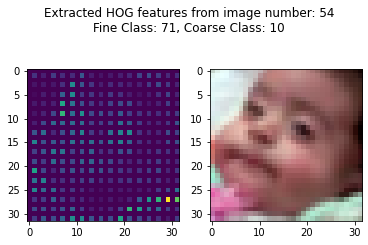

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10942698 0.         ... 0.08851545 0.         0.09810723]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.17004606 0.         ... 0.14369398 0.         0.10488695]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13228604 0.         ... 0.05186538 0.         0.13363851]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10942698 0.         ... 0.08851545 0.         0.09810723]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.17004606 0.         ... 0.14369398 0.         0.10488695]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13228604 0.         ... 0.05186538 0.         0.13363851]]


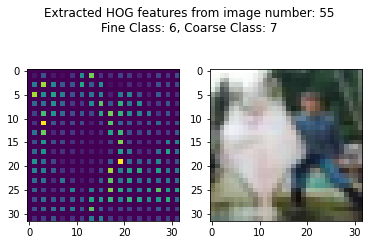

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03099561 0.         ... 0.0921394  0.         0.14055899]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.14807298 0.         ... 0.14911517 0.         0.11773521]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07287873 0.         ... 0.11330622 0.         0.10500398]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03099561 0.         ... 0.0921394  0.         0.14055899]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.14807298 0.         ... 0.14911517 0.         0.11773521]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07287873 0.         ... 0.11330622 0.         0.10500398]]


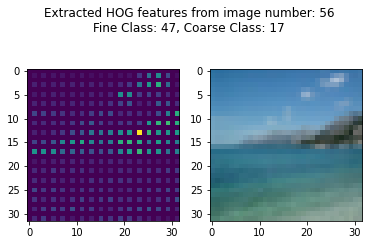

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01960784 0.         ... 0.10027484 0.         0.01592766]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0472706  0.         ... 0.08150529 0.         0.04418252]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0494813  0.         ... 0.02070893 0.         0.0288761 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01960784 0.         ... 0.10027484 0.         0.01592766]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0472706  0.         ... 0.08150529 0.         0.04418252]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0494813  0.         ... 0.02070893 0.         0.0288761 ]]


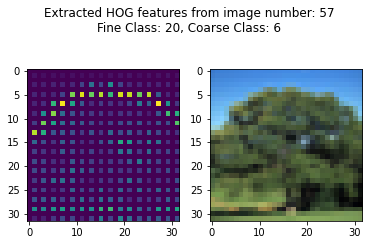

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03243437 0.         ... 0.03510148 0.         0.02686447]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.33367043 0.         ... 0.36587408 0.         0.40075719]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06199172 0.         ... 0.17550168 0.         0.1698128 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03243437 0.         ... 0.03510148 0.         0.02686447]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.33367043 0.         ... 0.36587408 0.         0.40075719]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06199172 0.         ... 0.17550168 0.         0.1698128 ]]


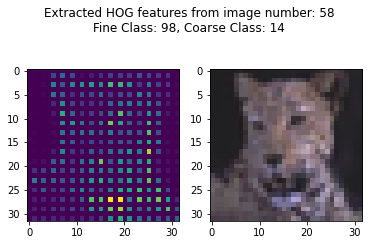

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00294118 0.         ... 0.07266764 0.         0.00732562]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.03931073 0.         ... 0.34182931 0.         0.1217473 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05100618 0.         ... 0.12305459 0.         0.14768408]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00294118 0.         ... 0.07266764 0.         0.00732562]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.03931073 0.         ... 0.34182931 0.         0.1217473 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05100618 0.         ... 0.12305459 0.         0.14768408]]


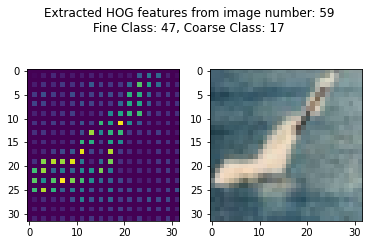

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00941721 0.         ... 0.04657692 0.         0.01770809]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04500711 0.         ... 0.09827721 0.         0.04683259]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04922298 0.         ... 0.08415719 0.         0.03712545]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00941721 0.         ... 0.04657692 0.         0.01770809]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04500711 0.         ... 0.09827721 0.         0.04683259]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04922298 0.         ... 0.08415719 0.         0.03712545]]


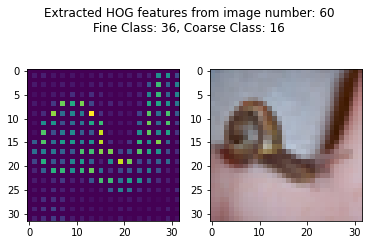

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03735783 0.         ... 0.2861492  0.         0.12729998]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05474542 0.         ... 0.04442026 0.         0.01802139]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04560616 0.         ... 0.04340927 0.         0.02184324]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03735783 0.         ... 0.2861492  0.         0.12729998]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05474542 0.         ... 0.04442026 0.         0.01802139]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04560616 0.         ... 0.04340927 0.         0.02184324]]


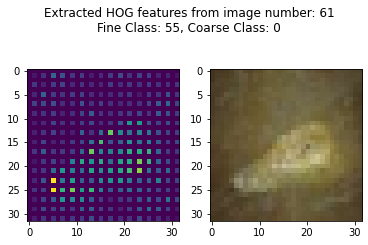

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01452613 0.         ... 0.02526516 0.         0.01257936]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02070358 0.         ... 0.04980799 0.         0.02046123]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01868849 0.         ... 0.0193411  0.         0.00882353]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01452613 0.         ... 0.02526516 0.         0.01257936]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02070358 0.         ... 0.04980799 0.         0.02046123]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01868849 0.         ... 0.0193411  0.         0.00882353]]


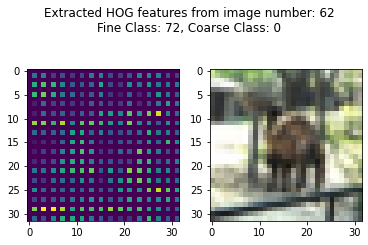

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.25722468 0.         ... 0.16023755 0.         0.13066366]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.52990863 0.         ... 0.2094204  0.         0.20951931]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.21271681 0.         ... 0.18581666 0.         0.17815788]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.25722468 0.         ... 0.16023755 0.         0.13066366]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.52990863 0.         ... 0.2094204  0.         0.20951931]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.21271681 0.         ... 0.18581666 0.         0.17815788]]


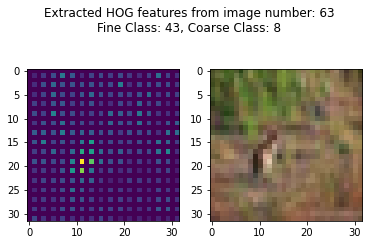

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05491727 0.         ... 0.11465989 0.         0.07774336]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09730496 0.         ... 0.15345741 0.         0.08372477]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12100419 0.         ... 0.0539529  0.         0.0651109 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05491727 0.         ... 0.11465989 0.         0.07774336]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09730496 0.         ... 0.15345741 0.         0.08372477]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12100419 0.         ... 0.0539529  0.         0.0651109 ]]


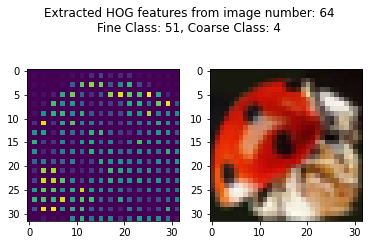

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0127451  0.         ... 0.01470588 0.         0.00506106]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.2008904  0.         ... 0.47018594 0.         0.16658161]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00698344 0.         ... 0.27153595 0.         0.04440037]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0127451  0.         ... 0.01470588 0.         0.00506106]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.2008904  0.         ... 0.47018594 0.         0.16658161]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00698344 0.         ... 0.27153595 0.         0.04440037]]


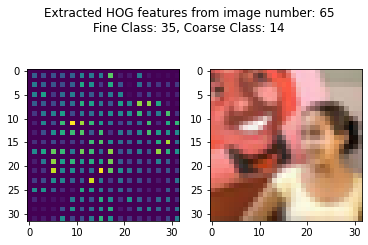

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.19898617 0.         ... 0.01902678 0.         0.01222758]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02359045 0.         ... 0.15688105 0.         0.24292378]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03788562 0.         ... 0.13284949 0.         0.27650657]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.19898617 0.         ... 0.01902678 0.         0.01222758]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02359045 0.         ... 0.15688105 0.         0.24292378]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03788562 0.         ... 0.13284949 0.         0.27650657]]


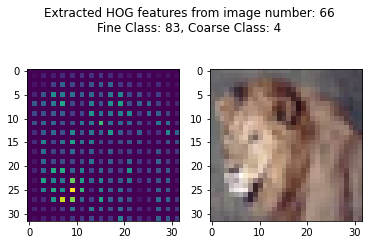

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01333877 0.         ... 0.02820633 0.         0.01523922]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05240552 0.         ... 0.13011988 0.         0.08478102]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01893501 0.         ... 0.15112306 0.         0.08842162]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01333877 0.         ... 0.02820633 0.         0.01523922]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05240552 0.         ... 0.13011988 0.         0.08478102]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01893501 0.         ... 0.15112306 0.         0.08842162]]


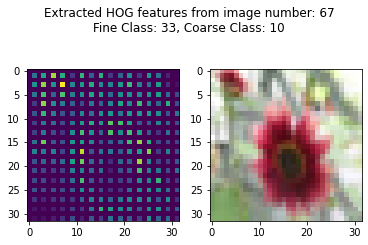

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.24036877 0.         ... 0.0602894  0.         0.01099955]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04118769 0.         ... 0.16017036 0.         0.17454353]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02406275 0.         ... 0.21809516 0.         0.07014118]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.24036877 0.         ... 0.0602894  0.         0.01099955]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.04118769 0.         ... 0.16017036 0.         0.17454353]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02406275 0.         ... 0.21809516 0.         0.07014118]]


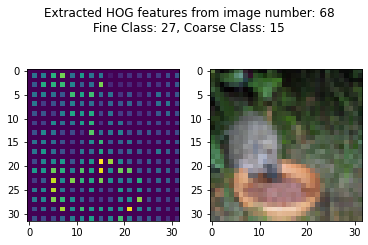

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1822475  0.         ... 0.11291528 0.         0.12913727]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.11614831 0.         ... 0.08842779 0.         0.08131025]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11803325 0.         ... 0.06250632 0.         0.05568971]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1822475  0.         ... 0.11291528 0.         0.12913727]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.11614831 0.         ... 0.08842779 0.         0.08131025]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11803325 0.         ... 0.06250632 0.         0.05568971]]


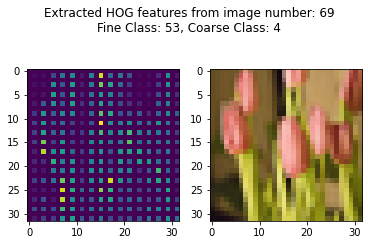

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02058823 0.         ... 0.35463199 0.         0.04769851]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.16650239 0.         ... 0.34641251 0.         0.25211641]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04909693 0.         ... 0.36435509 0.         0.25590896]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02058823 0.         ... 0.35463199 0.         0.04769851]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.16650239 0.         ... 0.34641251 0.         0.25211641]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04909693 0.         ... 0.36435509 0.         0.25590896]]


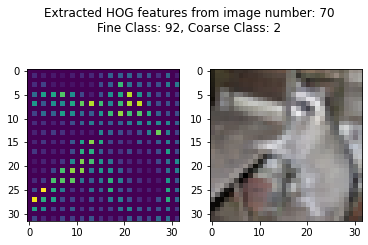

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06282669 0.         ... 0.17782593 0.         0.04344432]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.31344293 0.         ... 0.20705171 0.         0.09302365]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11279176 0.         ... 0.1981838  0.         0.07383459]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06282669 0.         ... 0.17782593 0.         0.04344432]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.31344293 0.         ... 0.20705171 0.         0.09302365]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11279176 0.         ... 0.1981838  0.         0.07383459]]


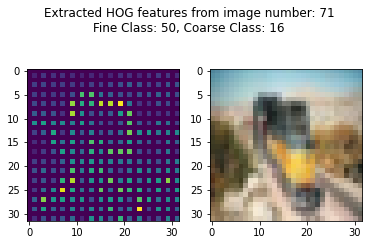

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05091344 0.         ... 0.0872072  0.         0.065838  ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.15260437 0.         ... 0.26103743 0.         0.1702958 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0695024  0.         ... 0.23796506 0.         0.17978524]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05091344 0.         ... 0.0872072  0.         0.065838  ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.15260437 0.         ... 0.26103743 0.         0.1702958 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0695024  0.         ... 0.23796506 0.         0.17978524]]


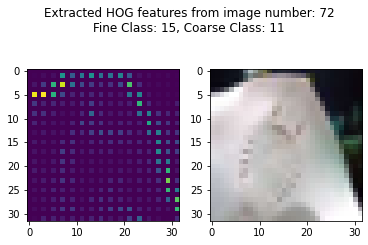

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00702184 0.         ... 0.01874814 0.         0.00796383]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02490511 0.         ... 0.04265288 0.         0.56177032]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01245902 0.         ... 0.0052925  0.         0.10296695]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00702184 0.         ... 0.01874814 0.         0.00796383]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02490511 0.         ... 0.04265288 0.         0.56177032]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01245902 0.         ... 0.0052925  0.         0.10296695]]


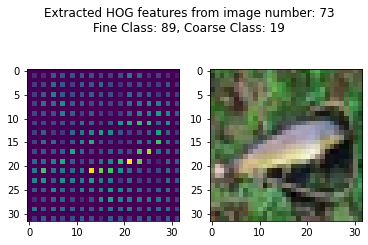

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08531453 0.         ... 0.09626198 0.         0.05051831]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.27233121 0.         ... 0.26373597 0.         0.16004195]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10098039 0.         ... 0.20380786 0.         0.14062173]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08531453 0.         ... 0.09626198 0.         0.05051831]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.27233121 0.         ... 0.26373597 0.         0.16004195]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10098039 0.         ... 0.20380786 0.         0.14062173]]


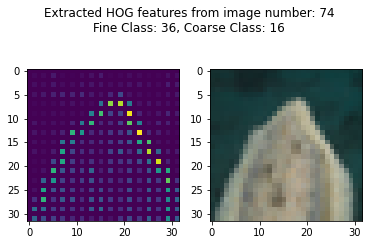

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01197167 0.         ... 0.02672202 0.         0.0231387 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.21975537 0.         ... 0.31824604 0.         0.18049081]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.19606345 0.         ... 0.30222183 0.         0.18248901]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01197167 0.         ... 0.02672202 0.         0.0231387 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.21975537 0.         ... 0.31824604 0.         0.18049081]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.19606345 0.         ... 0.30222183 0.         0.18248901]]


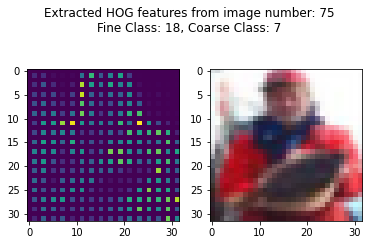

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07708159 0.         ... 0.00138648 0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09102469 0.         ... 0.48943228 0.         0.1951389 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06719673 0.         ... 0.51067361 0.         0.31006581]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07708159 0.         ... 0.00138648 0.         0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09102469 0.         ... 0.48943228 0.         0.1951389 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06719673 0.         ... 0.51067361 0.         0.31006581]]


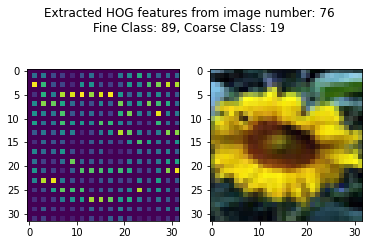

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.27686291 0.         ... 0.26797533 0.         0.26079977]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.10122828 0.         ... 0.30029629 0.         0.26034708]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10690723 0.         ... 0.10962685 0.         0.11568628]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.27686291 0.         ... 0.26797533 0.         0.26079977]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.10122828 0.         ... 0.30029629 0.         0.26034708]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10690723 0.         ... 0.10962685 0.         0.11568628]]


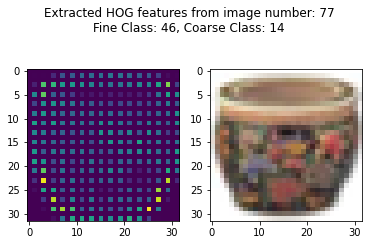

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00415301 0.         ... 0.01975914 0.         0.00702184]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00098039 0.         ... 0.00392157 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00098039 0.         ... 0.         0.         0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00415301 0.         ... 0.01975914 0.         0.00702184]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00098039 0.         ... 0.00392157 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00098039 0.         ... 0.         0.         0.        ]]


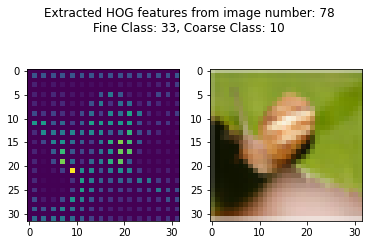

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.17819664 0.         ... 0.16882992 0.         0.18629681]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.20691194 0.         ... 0.08164276 0.         0.09761887]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.24178375 0.         ... 0.10032695 0.         0.10417102]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.17819664 0.         ... 0.16882992 0.         0.18629681]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.20691194 0.         ... 0.08164276 0.         0.09761887]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.24178375 0.         ... 0.10032695 0.         0.10417102]]


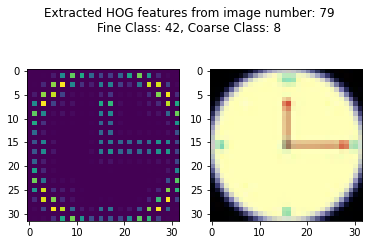

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.01245902 0.         0.00588235]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01343942 0.         ... 0.25688861 0.         0.00830602]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00588235 0.         ... 0.00732562 0.         0.00530805]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.01245902 0.         0.00588235]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01343942 0.         ... 0.25688861 0.         0.00830602]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00588235 0.         ... 0.00732562 0.         0.00530805]]


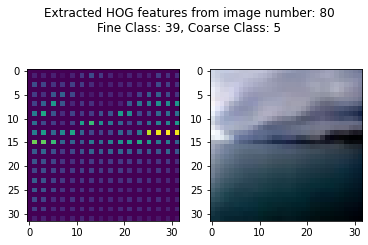

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0357246  0.         ... 0.05714685 0.         0.05030708]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0734203  0.         ... 0.03621086 0.         0.03783457]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03377807 0.         ... 0.02630914 0.         0.01910474]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0357246  0.         ... 0.05714685 0.         0.05030708]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0734203  0.         ... 0.03621086 0.         0.03783457]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03377807 0.         ... 0.02630914 0.         0.01910474]]


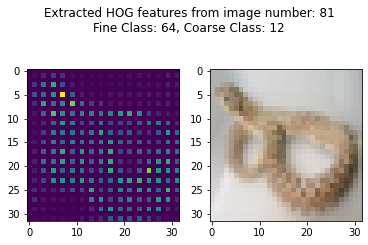

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01534986 0.         ... 0.03926458 0.         0.02745098]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02592908 0.         ... 0.0627365  0.         0.02352941]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01049824 0.         ... 0.0133488  0.         0.0102668 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01534986 0.         ... 0.03926458 0.         0.02745098]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02592908 0.         ... 0.0627365  0.         0.02352941]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01049824 0.         ... 0.0133488  0.         0.0102668 ]]


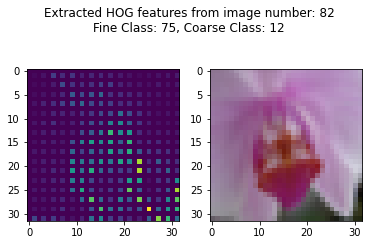

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01137799 0.         ... 0.03303778 0.         0.03955065]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02798778 0.         ... 0.28704684 0.         0.36471969]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1169443  0.         ... 0.37261709 0.         0.19666909]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01137799 0.         ... 0.03303778 0.         0.03955065]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02798778 0.         ... 0.28704684 0.         0.36471969]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1169443  0.         ... 0.37261709 0.         0.19666909]]


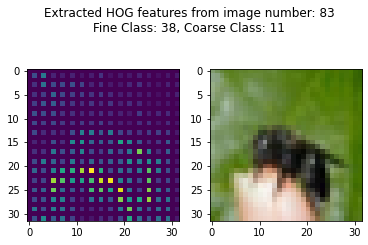

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13955943 0.         ... 0.03819971 0.         0.04218265]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.22957575 0.         ... 0.20852859 0.         0.03714946]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14886064 0.         ... 0.22292745 0.         0.0427023 ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.13955943 0.         ... 0.03819971 0.         0.04218265]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.22957575 0.         ... 0.20852859 0.         0.03714946]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14886064 0.         ... 0.22292745 0.         0.0427023 ]]


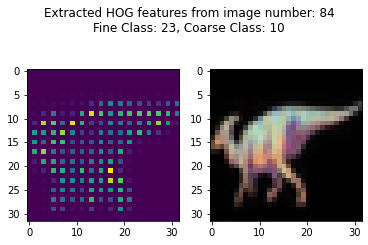

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00392157 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00392157 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


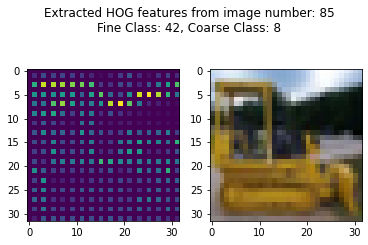

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09431498 0.         ... 0.14774498 0.         0.0890472 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.14380255 0.         ... 0.25502201 0.         0.1820406 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05967534 0.         ... 0.11003832 0.         0.07410773]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09431498 0.         ... 0.14774498 0.         0.0890472 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.14380255 0.         ... 0.25502201 0.         0.1820406 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05967534 0.         ... 0.11003832 0.         0.07410773]]


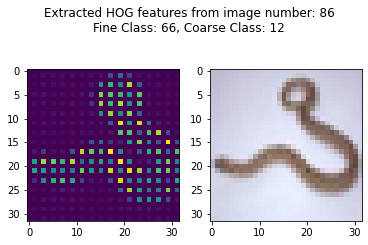

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00898262 0.         ... 0.01610154 0.         0.0133488 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01580697 0.         ... 0.01884535 0.         0.01302488]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01003536 0.         ... 0.01915603 0.         0.00830602]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00898262 0.         ... 0.01610154 0.         0.0133488 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.01580697 0.         ... 0.01884535 0.         0.01302488]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01003536 0.         ... 0.01915603 0.         0.00830602]]


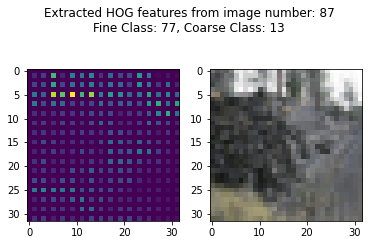

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07241771 0.         ... 0.04217571 0.         0.01513135]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05807284 0.         ... 0.04677092 0.         0.02670843]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08760718 0.         ... 0.0365518  0.         0.02846018]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07241771 0.         ... 0.04217571 0.         0.01513135]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05807284 0.         ... 0.04677092 0.         0.02670843]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08760718 0.         ... 0.0365518  0.         0.02846018]]


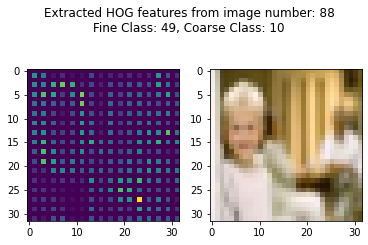

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.40117784 0.         ... 0.20968323 0.         0.10487367]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09661606 0.         ... 0.26649007 0.         0.12093877]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09705882 0.         ... 0.21118246 0.         0.15648307]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.40117784 0.         ... 0.20968323 0.         0.10487367]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09661606 0.         ... 0.26649007 0.         0.12093877]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09705882 0.         ... 0.21118246 0.         0.15648307]]


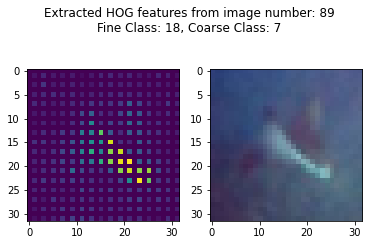

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01431917 0.         ... 0.0271756  0.         0.0127451 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0168868  0.         ... 0.03178156 0.         0.02239702]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0118854  0.         ... 0.03430356 0.         0.01818039]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.01431917 0.         ... 0.0271756  0.         0.0127451 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0168868  0.         ... 0.03178156 0.         0.02239702]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0118854  0.         ... 0.03430356 0.         0.01818039]]


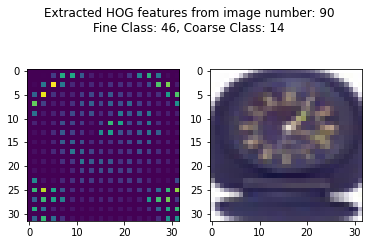

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00219222 0.         ... 0.02279244 0.         0.00718094]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.48217884 0.         ... 0.47334077 0.         0.51916611]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.24551742 0.         ... 0.39001274 0.         0.40479231]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00219222 0.         ... 0.02279244 0.         0.00718094]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.48217884 0.         ... 0.47334077 0.         0.51916611]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.24551742 0.         ... 0.39001274 0.         0.40479231]]


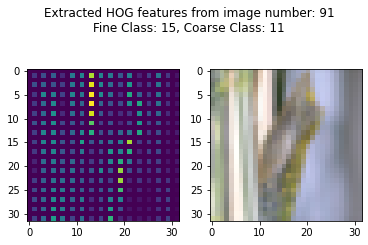

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09995826 0.         ... 0.10482341 0.         0.03374726]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.12778629 0.         ... 0.12552235 0.         0.01575595]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12557034 0.         ... 0.11946236 0.         0.00882354]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09995826 0.         ... 0.10482341 0.         0.03374726]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.12778629 0.         ... 0.12552235 0.         0.01575595]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.12557034 0.         ... 0.11946236 0.         0.00882354]]


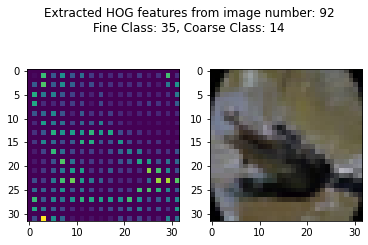

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.012794   0.         ... 0.34383264 0.         0.06426088]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.29612601 0.         ... 0.07086914 0.         0.26169366]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11244468 0.         ... 0.21585755 0.         0.18568891]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.012794   0.         ... 0.34383264 0.         0.06426088]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.29612601 0.         ... 0.07086914 0.         0.26169366]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.11244468 0.         ... 0.21585755 0.         0.18568891]]


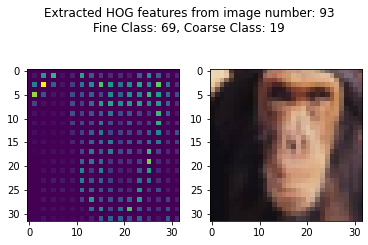

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03630172 0.         ... 0.09734916 0.         0.08208906]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00294118 0.         ... 0.17406307 0.         0.0583797 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00294118 0.         ... 0.18923321 0.         0.07677548]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.03630172 0.         ... 0.09734916 0.         0.08208906]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.00294118 0.         ... 0.17406307 0.         0.0583797 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00294118 0.         ... 0.18923321 0.         0.07677548]]


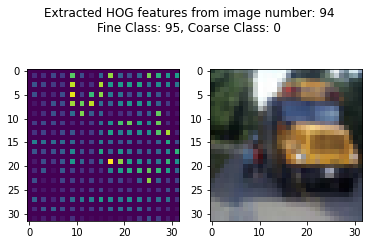

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08183962 0.         ... 0.33300399 0.         0.35252589]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0775569  0.         ... 0.08551956 0.         0.0297016 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0245098  0.         ... 0.04816635 0.         0.03217319]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.08183962 0.         ... 0.33300399 0.         0.35252589]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.0775569  0.         ... 0.08551956 0.         0.0297016 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0245098  0.         ... 0.04816635 0.         0.03217319]]


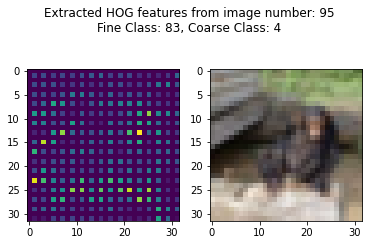

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09956348 0.         ... 0.08021454 0.         0.16444542]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.1230177  0.         ... 0.22306736 0.         0.14125803]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0304248  0.         ... 0.17008001 0.         0.0172    ]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.09956348 0.         ... 0.08021454 0.         0.16444542]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.1230177  0.         ... 0.22306736 0.         0.14125803]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.0304248  0.         ... 0.17008001 0.         0.0172    ]]


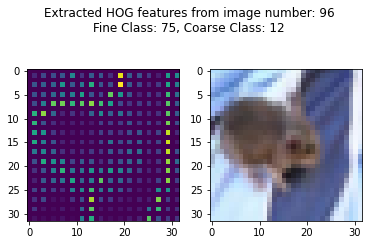

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06936733 0.         ... 0.35044653 0.         0.30591062]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09909512 0.         ... 0.11208034 0.         0.08416151]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02890866 0.         ... 0.10781571 0.         0.09808182]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.06936733 0.         ... 0.35044653 0.         0.30591062]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.09909512 0.         ... 0.11208034 0.         0.08416151]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02890866 0.         ... 0.10781571 0.         0.09808182]]


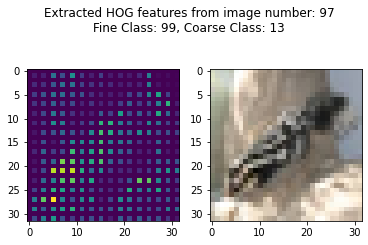

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04632201 0.         ... 0.01921102 0.         0.00588235]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.26372084 0.         ... 0.25006467 0.         0.19968697]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1404374  0.         ... 0.09470054 0.         0.03889369]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.04632201 0.         ... 0.01921102 0.         0.00588235]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.26372084 0.         ... 0.25006467 0.         0.19968697]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.1404374  0.         ... 0.09470054 0.         0.03889369]]


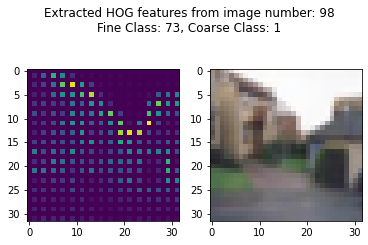

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05304409 0.         ... 0.00651988 0.         0.00669454]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05049973 0.         ... 0.05196954 0.         0.05900567]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02943897 0.         ... 0.02376965 0.         0.01731064]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05304409 0.         ... 0.00651988 0.         0.00669454]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05049973 0.         ... 0.05196954 0.         0.05900567]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.02943897 0.         ... 0.02376965 0.         0.01731064]]


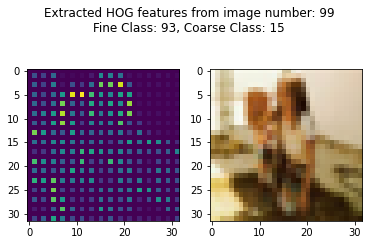

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16920216 0.         ... 0.02439345 0.         0.01868849]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05182792 0.         ... 0.2324944  0.         0.1947185 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14118507 0.         ... 0.04246768 0.         0.13714166]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.16920216 0.         ... 0.02439345 0.         0.01868849]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.05182792 0.         ... 0.2324944  0.         0.1947185 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.14118507 0.         ... 0.04246768 0.         0.13714166]]


In [77]:

test_images_normalised = []

print(test_images_normalised.shape)

from numpy import load

try:
    


data = load('data.npy')

print(data)

for image_index in range(0, 100):
    image = test_images[:, :, :, image_index]

    # Extract features from a single image
    _, hog_image = skimage.feature.hog(image, pixels_per_cell=[2,2], cells_per_block=[3,3], visualize=True)
    
    plt.figure()
    plt.subplot(121)
    plt.imshow(hog_image)
    plt.subplot(122)
    plt.imshow(image)
    plt.suptitle(f'Extracted HOG features from image number: {image_index}\nFine Class: {label_fine[image_index]}, Coarse Class: {label_coarse[image_index]}')
    plt.show(block=False)
    
    print(hog_image)
    
    test_images_normalised[image_index] = hog_image
    
    print(train_images_normalised[image_index])
    
train_images_output = numpy.array(train_images_normalised)


# save numpy array as npy file
from numpy import asarray
from numpy import save

data = asarray(train_images_output)
# save to npy file
save('hog_array.npy', data)

In [69]:
print(test_images_normalised)

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.04521298 0.         ... 0.05611777 0.         0.06156113]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.08530456 0.         ... 0.14217369 0.         0.20652512]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.05456728 0.         ... 0.09343634 0.         0.15697937]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.11492586 0.         ... 0.23311405 0.         0.10532761]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.15059458 0.         ... 0.08375339 0.         0.0738932 ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.09743597 0.         ... 0.13500496 0.         0.08639684]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.022478

Normalise the data, for each image do a hog, add how to array


In [57]:
print(train_images_normalised)

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.00138648 0.         ... 0.23965091 0.         0.18503384]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.13589142 0.         ... 0.26251863 0.         0.22911911]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.13536761 0.         ... 0.33175385 0.         0.38671539]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.00392157 0.         ... 0.00392157 0.         0.00392157]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.00392157 0.         ... 0.00392157 0.         0.00392157]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.025029

### Create and train a Tensorflow Convolutional Neural Network on the training set using Conv2D and pooling Layers

In [79]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, -1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


Check the Data cardinality

In [85]:
print(test_images_normalised.shape)

(10000, 32, 32)


In [92]:
print(train_images_normalised.shape)
print(test_images_normalised.shape)

#train_images_normalised = np.array(train_images_normalised).reshape(50000, -1, 32, 32)
#test_images_normalised = np.array(test_images_normalised).reshape(10000, -1, 32, 32)

#train_images_normalised = train_images_normalised[:, 0, :, :]
test_images_normalised = test_images_normalised[:, 0, :, :]

train_images_normalised = np.transpose(train_images_normalised, (1, 2, 0))
test_images_normalised = np.transpose(test_images_normalised, (1, 2, 0))

print(train_images_normalised.shape)
print(test_images_normalised.shape)


print(label_fine.shape)
print(test_label_fine.shape)

(50000, 32, 32)
(10000, 1, 32, 32)
(32, 32, 50000)
(32, 32, 10000)
(50000,)
(10000,)


In [15]:
#check number of unique  labels in coarse dtaaset
#number of labels

output_num_fine = (np.unique(label_fine).shape[0])
print(output_num_fine)

output_num_coarse = (np.unique(label_coarse).shape[0])
print(output_num_coarse)

100
20


In [ ]:
xTrn, xTst, yTrn, yTst = train_test_split(train_images_normalised, label_coarse, test_size=0.2)

In [93]:
model.add(tf.keras.layers.Flatten()) #dense layers can oinly have 1d so flattern araray to one dimension
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(output_num_coarse, activation='softmax'))

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(xTrn, yTrn, epochs=10, 
                    validation_data=(xTst, yTst))

ValueError: Data cardinality is ambiguous:
  x sizes: 1
  y sizes: 50000
Make sure all arrays contain the same number of samples.

### Plot models traing curves 

1563/1563 - 2s - loss: 0.0000e+00 - accuracy: 0.0100
0.009999999776482582


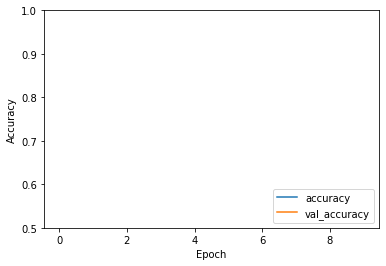

In [39]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(images_normalised,  label_fine_normalised, verbose=2)

print(test_acc)

In [41]:
score = model.evaluate(test_images_normalised, test_label_fine_normalised, verbose=0)
print(score)

[0.0, 0.009999999776482582]
